# Imports

In [4]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import matplotlib.dates as mdates
from scipy import stats
from scipy.optimize import curve_fit

# Convert to Datetime

In [5]:
df = pd.read_csv("Data/stock0_day0_trades.csv.gz", index_col="ts")
df

,price,qty
ts,,
2026-01-26 09:00:27.018202,55.00,2
2026-01-26 09:00:27.018202,55.00,10
2026-01-26 09:00:27.018202,55.00,10
2026-01-26 09:00:27.041728,54.97,446
2026-01-26 09:00:27.042153,54.97,24
...,...,...
2026-01-26 17:29:58.691949,55.64,67
2026-01-26 17:29:58.691949,55.64,186
2026-01-26 17:29:58.691949,55.64,3


In [6]:
df.index = pd.to_datetime(df.index)

In [7]:
df

,price,qty
ts,,
2026-01-26 09:00:27.018202,55.00,2
2026-01-26 09:00:27.018202,55.00,10
2026-01-26 09:00:27.018202,55.00,10
2026-01-26 09:00:27.041728,54.97,446
2026-01-26 09:00:27.042153,54.97,24
...,...,...
2026-01-26 17:29:58.691949,55.64,67
2026-01-26 17:29:58.691949,55.64,186
2026-01-26 17:29:58.691949,55.64,3


In [8]:
type(df.index.values[0])

numpy.datetime64

In [9]:
def open_convert_data(name : str) -> pd.DataFrame :
    df = pd.read_csv(f"Data/{name}", index_col="ts")
    df.index = pd.to_datetime(df.index)
    return df

In [10]:
test = open_convert_data("stock0_day0_updates.csv.gz")

In [11]:
test

,type,bp,bq,ap,aq
ts,,,,,
2026-01-26 09:00:00.340497,U,NaN,19671.0,NaN,24789.0
2026-01-26 09:00:00.503532,U,NaN,19671.0,NaN,24789.0
2026-01-26 09:00:00.503539,U,NaN,19671.0,NaN,24789.0
2026-01-26 09:00:00.503565,U,NaN,19671.0,NaN,24789.0
2026-01-26 09:00:00.503735,U,NaN,19671.0,NaN,24789.0
...,...,...,...,...,...
2026-01-26 17:29:58.696978,U,55.63,337.0,55.65,462.0
2026-01-26 17:29:58.697298,U,55.63,557.0,55.65,462.0
2026-01-26 17:29:59.044651,U,55.63,517.0,55.65,462.0


# Question 1 : Trades

## 1.1 Data exploration

In [12]:
df0 = open_convert_data("stock0_day0_trades.csv.gz")
df1 = open_convert_data("stock0_day1_trades.csv.gz")
df2 = open_convert_data("stock1_day0_trades.csv.gz")
df3 = open_convert_data("stock2_day0_trades.csv.gz")

In [13]:
df0.dtypes

price    float64
qty        int64
dtype: object

In [14]:
df2.dtypes

price    float64
qty        int64
dtype: object

In [15]:
df0.describe()

,price,qty
count,19076.000000,19076.000000
mean,55.430137,134.961260
std,0.165443,231.604595
min,54.840000,1.000000
25%,55.340000,40.000000
50%,55.420000,114.000000
75%,55.550000,152.000000
max,55.740000,11400.000000


In [16]:
df2.describe()

,price,qty
count,4927.000000,4927.000000
mean,26.511555,103.649077
std,0.183140,233.594998
min,26.030000,1.000000
25%,26.365000,31.000000
50%,26.490000,53.000000
75%,26.660000,139.000000
max,26.845000,12031.000000


In [17]:
print(df0.isna().sum())

price    0
qty      0
dtype: int64


In [39]:
print(df2.isna().sum())

price    0
qty      0
dtype: int64


In [19]:
print(df3.isna().sum())

price    0
qty      0
dtype: int64


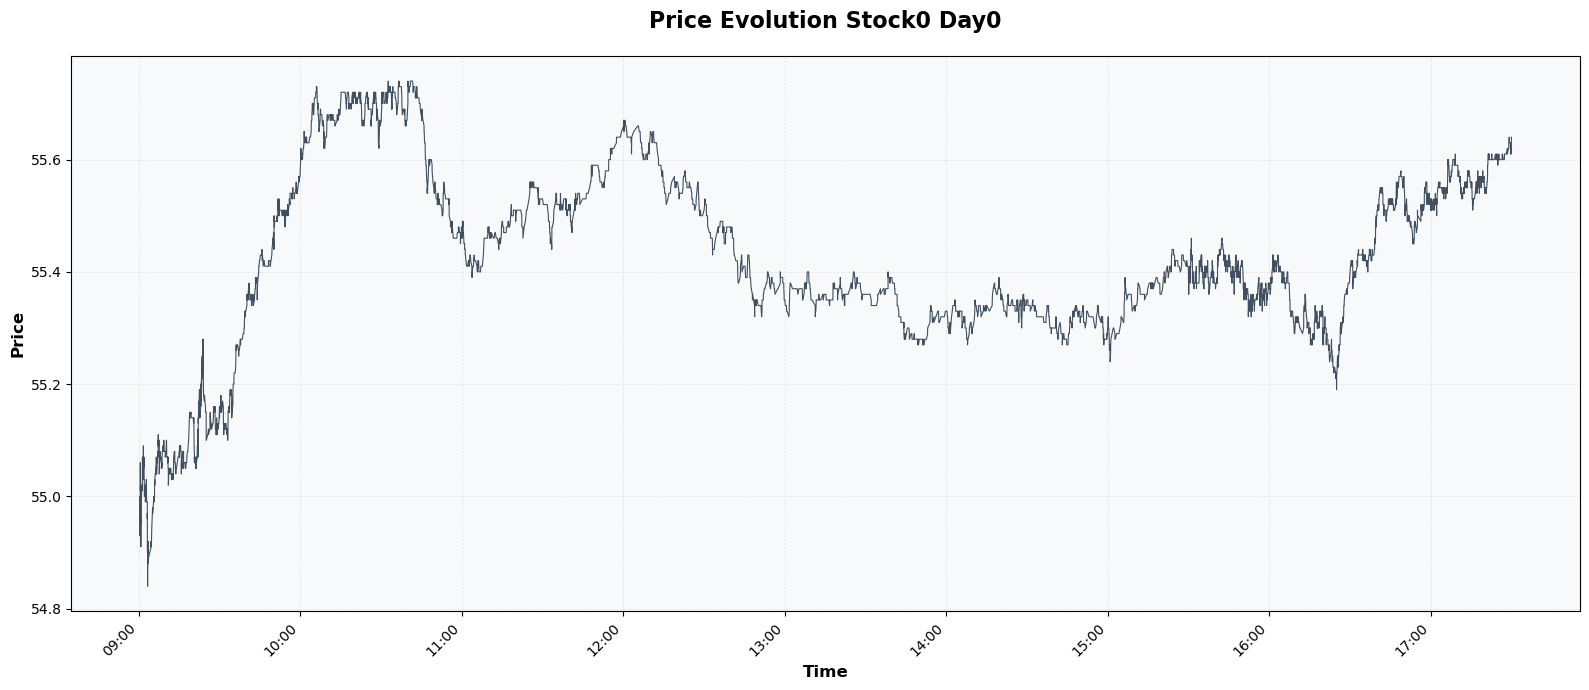

In [20]:
fig, ax = plt.subplots(figsize=(16, 7))

ax.plot(df0.index, df0['price'], linewidth=0.8, color='#2C3E50', alpha=0.9)

ax.set_title('Price Evolution Stock0 Day0', 
             fontsize=16, fontweight='bold', pad=20)
ax.set_xlabel('Time', fontsize=12, fontweight='bold')
ax.set_ylabel('Price', fontsize=12, fontweight='bold')

ax.grid(True, alpha=0.3, linestyle='--', linewidth=0.5)
ax.set_facecolor('#F8F9FA')

ax.xaxis.set_major_formatter(mdates.DateFormatter('%H:%M'))
plt.xticks(rotation=45, ha='right')

plt.tight_layout()
plt.show()

We clearly see that the price function is a step function

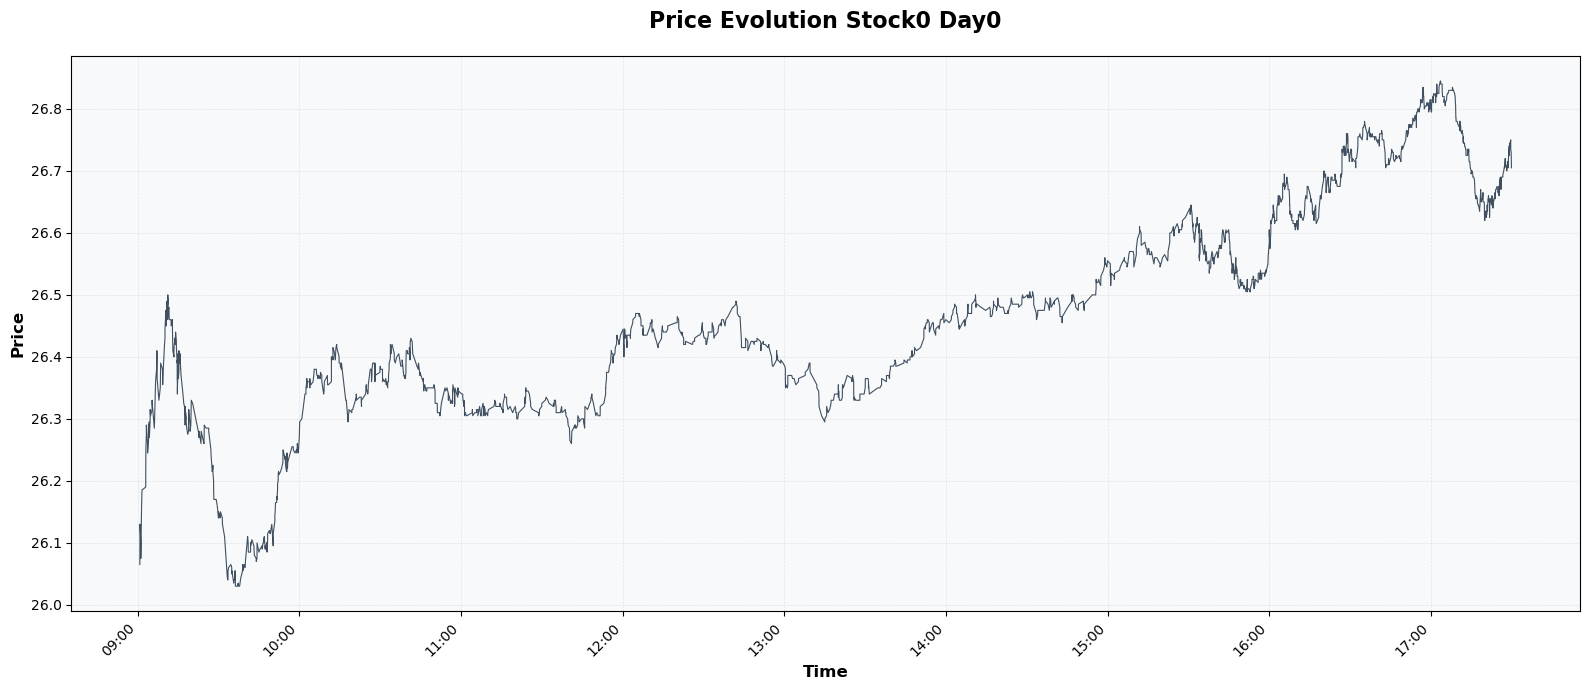

In [ ]:
fig, ax = plt.subplots(figsize=(16, 7))

ax.plot(df2.index, df2['price'], linewidth=0.8, color='#2C3E50', alpha=0.9)

ax.set_title('Price Evolution Stock1 Day0', 
             fontsize=16, fontweight='bold', pad=20)
ax.set_xlabel('Time', fontsize=12, fontweight='bold')
ax.set_ylabel('Price', fontsize=12, fontweight='bold')

ax.grid(True, alpha=0.3, linestyle='--', linewidth=0.5)
ax.set_facecolor('#F8F9FA')

ax.xaxis.set_major_formatter(mdates.DateFormatter('%H:%M'))
plt.xticks(rotation=45, ha='right')

plt.tight_layout()
plt.show()

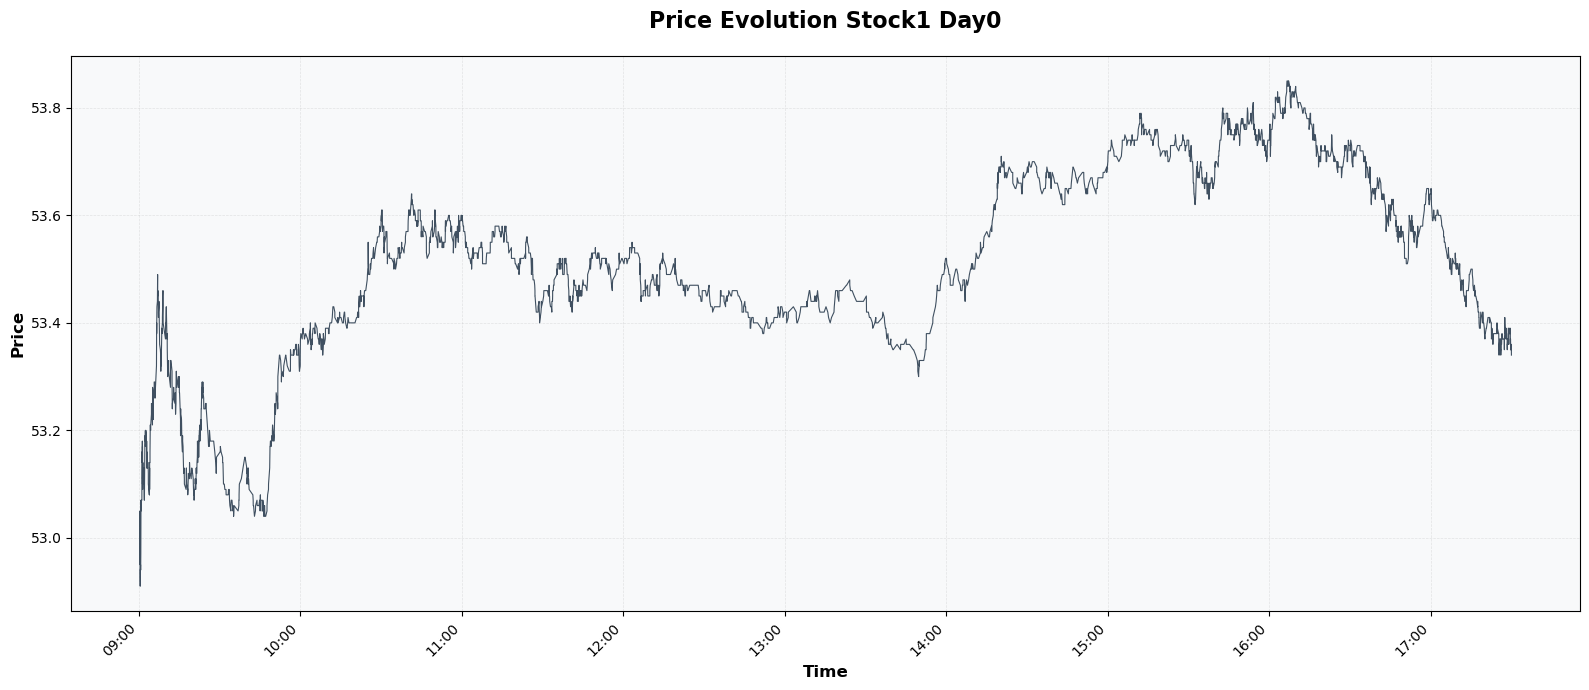

In [ ]:
fig, ax = plt.subplots(figsize=(16, 7))

ax.plot(df3.index, df3['price'], linewidth=0.8, color='#2C3E50', alpha=0.9)

ax.set_title('Price Evolution Stock2 Day0', 
             fontsize=16, fontweight='bold', pad=20)
ax.set_xlabel('Time', fontsize=12, fontweight='bold')
ax.set_ylabel('Price', fontsize=12, fontweight='bold')

ax.grid(True, alpha=0.3, linestyle='--', linewidth=0.5)
ax.set_facecolor('#F8F9FA')

ax.xaxis.set_major_formatter(mdates.DateFormatter('%H:%M'))
plt.xticks(rotation=45, ha='right')

plt.tight_layout()
plt.show()

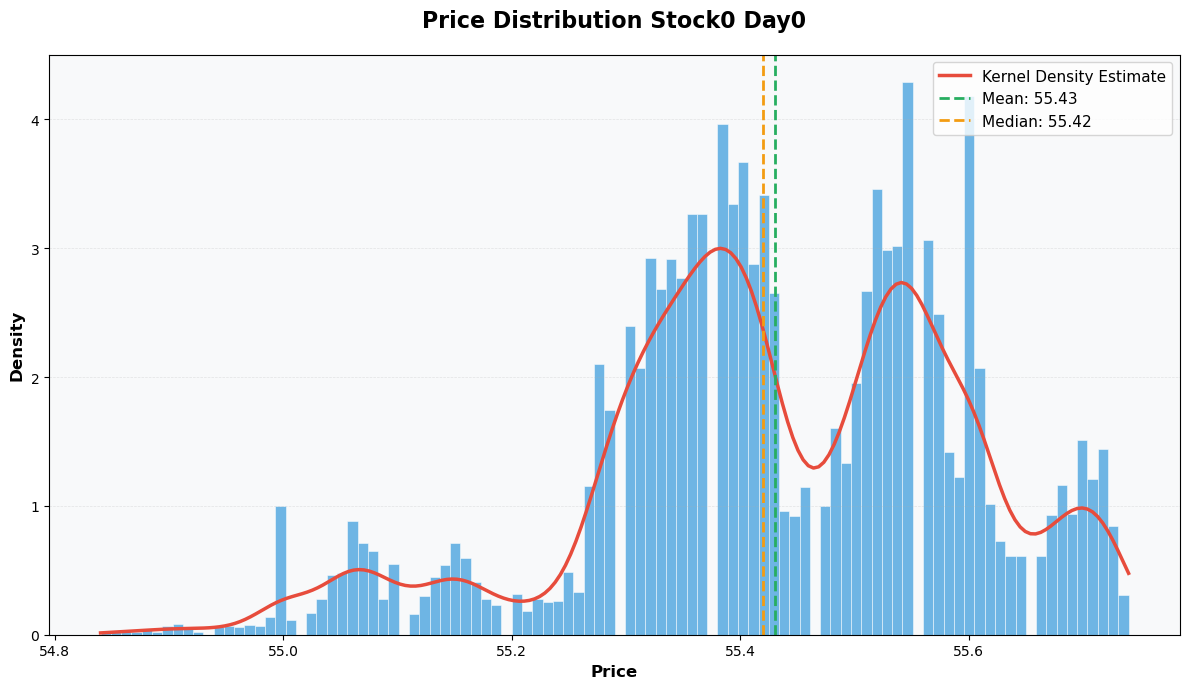

Mean: 55.4301
Median: 55.4200
Std: 0.1654
Skewness: -0.5435
Kurtosis: 0.2436


In [21]:
fig, ax = plt.subplots(figsize=(12, 7))

n, bins, patches = ax.hist(df0['price'], bins=100, 
                           density=True, alpha=0.7, 
                           color='#3498DB', edgecolor='white', linewidth=0.5)

density = stats.gaussian_kde(df0['price'])
xs = np.linspace(df0['price'].min(), df0['price'].max(), 200)
ax.plot(xs, density(xs), color='#E74C3C', linewidth=2.5, 
        label='Kernel Density Estimate')

mean_price = df0['price'].mean()
median_price = df0['price'].median()
ax.axvline(mean_price, color='#27AE60', linestyle='--', linewidth=2, 
           label=f'Mean: {mean_price:.2f}')
ax.axvline(median_price, color='#F39C12', linestyle='--', linewidth=2, 
           label=f'Median: {median_price:.2f}')

ax.set_title('Price Distribution Stock0 Day0', fontsize=16, fontweight='bold', pad=20)
ax.set_xlabel('Price', fontsize=12, fontweight='bold')
ax.set_ylabel('Density', fontsize=12, fontweight='bold')

ax.grid(True, alpha=0.3, linestyle='--', linewidth=0.5, axis='y')
ax.set_facecolor('#F8F9FA')
ax.legend(fontsize=11, loc='upper right')

plt.tight_layout()
plt.show()

print(f"Mean: {mean_price:.4f}")
print(f"Median: {median_price:.4f}")
print(f"Std: {df0['price'].std():.4f}")
print(f"Skewness: {df0['price'].skew():.4f}")
print(f"Kurtosis: {df0['price'].kurtosis():.4f}")

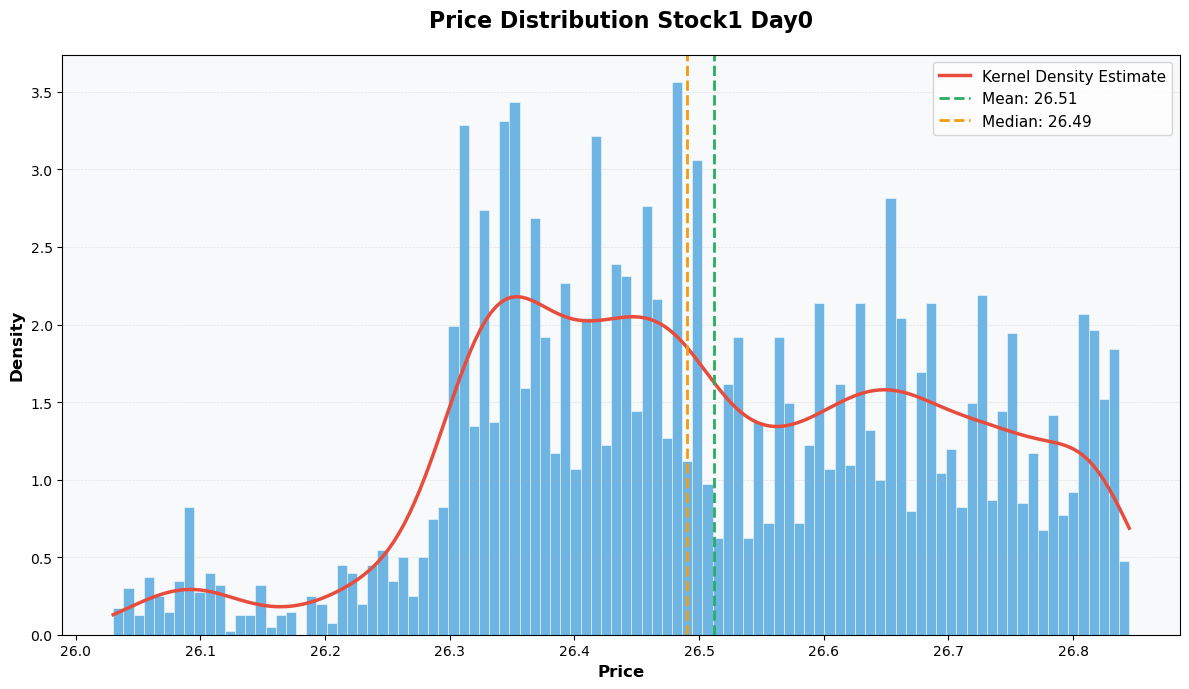

Mean: 26.5116
Median: 26.4900
Std: 0.1831
Skewness: -0.0829
Kurtosis: -0.6311


In [45]:
fig, ax = plt.subplots(figsize=(12, 7))

n, bins, patches = ax.hist(df2['price'], bins=100, 
                           density=True, alpha=0.7, 
                           color='#3498DB', edgecolor='white', linewidth=0.5)

density = stats.gaussian_kde(df2['price'])
xs = np.linspace(df2['price'].min(), df2['price'].max(), 200)
ax.plot(xs, density(xs), color='#E74C3C', linewidth=2.5, 
        label='Kernel Density Estimate')

mean_price = df2['price'].mean()
median_price = df2['price'].median()
ax.axvline(mean_price, color='#27AE60', linestyle='--', linewidth=2, 
           label=f'Mean: {mean_price:.2f}')
ax.axvline(median_price, color='#F39C12', linestyle='--', linewidth=2, 
           label=f'Median: {median_price:.2f}')

ax.set_title('Price Distribution Stock1 Day0', fontsize=16, fontweight='bold', pad=20)
ax.set_xlabel('Price', fontsize=12, fontweight='bold')
ax.set_ylabel('Density', fontsize=12, fontweight='bold')

ax.grid(True, alpha=0.3, linestyle='--', linewidth=0.5, axis='y')
ax.set_facecolor('#F8F9FA')
ax.legend(fontsize=11, loc='upper right')

plt.tight_layout()
plt.show()

print(f"Mean: {mean_price:.4f}")
print(f"Median: {median_price:.4f}")
print(f"Std: {df2['price'].std():.4f}")
print(f"Skewness: {df2['price'].skew():.4f}")
print(f"Kurtosis: {df2['price'].kurtosis():.4f}")

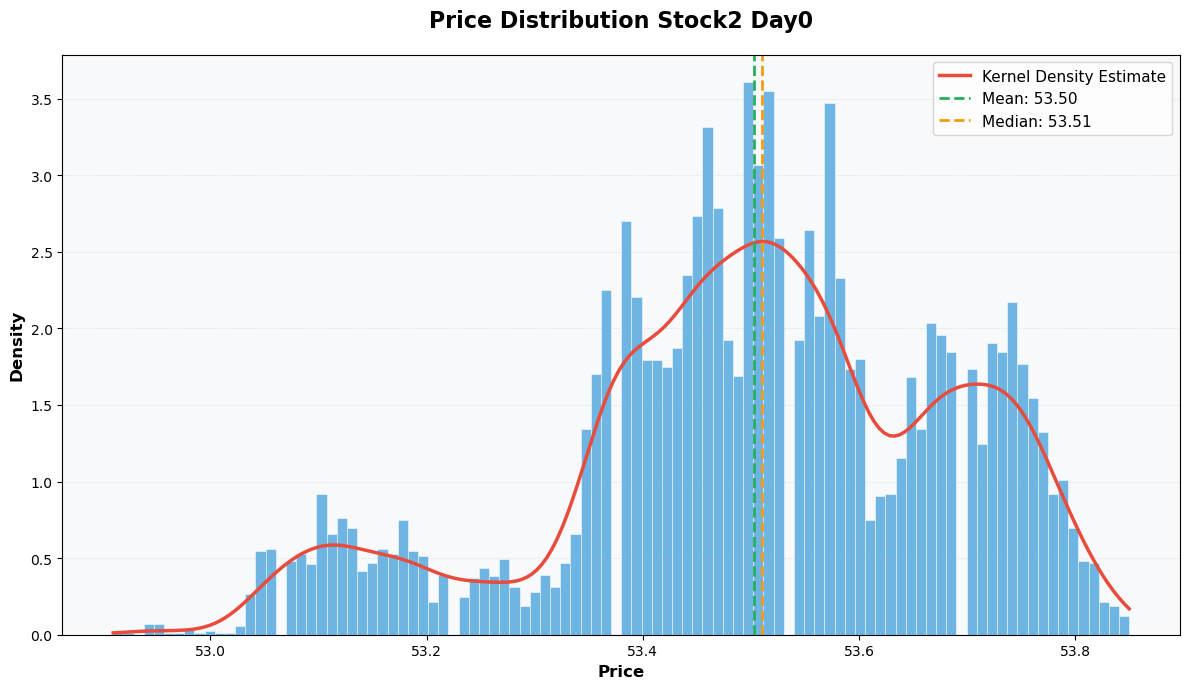

Mean: 53.5026
Median: 53.5100
Std: 0.1819
Skewness: -0.5526
Kurtosis: -0.0090


In [47]:
fig, ax = plt.subplots(figsize=(12, 7))

n, bins, patches = ax.hist(df3['price'], bins=100, 
                           density=True, alpha=0.7, 
                           color='#3498DB', edgecolor='white', linewidth=0.5)

density = stats.gaussian_kde(df3['price'])
xs = np.linspace(df3['price'].min(), df3['price'].max(), 200)
ax.plot(xs, density(xs), color='#E74C3C', linewidth=2.5, 
        label='Kernel Density Estimate')

mean_price = df3['price'].mean()
median_price = df3['price'].median()
ax.axvline(mean_price, color='#27AE60', linestyle='--', linewidth=2, 
           label=f'Mean: {mean_price:.2f}')
ax.axvline(median_price, color='#F39C12', linestyle='--', linewidth=2, 
           label=f'Median: {median_price:.2f}')

ax.set_title('Price Distribution Stock2 Day0', fontsize=16, fontweight='bold', pad=20)
ax.set_xlabel('Price', fontsize=12, fontweight='bold')
ax.set_ylabel('Density', fontsize=12, fontweight='bold')

ax.grid(True, alpha=0.3, linestyle='--', linewidth=0.5, axis='y')
ax.set_facecolor('#F8F9FA')
ax.legend(fontsize=11, loc='upper right')

plt.tight_layout()
plt.show()

print(f"Mean: {mean_price:.4f}")
print(f"Median: {median_price:.4f}")
print(f"Std: {df3['price'].std():.4f}")
print(f"Skewness: {df3['price'].skew():.4f}")
print(f"Kurtosis: {df3['price'].kurtosis():.4f}")

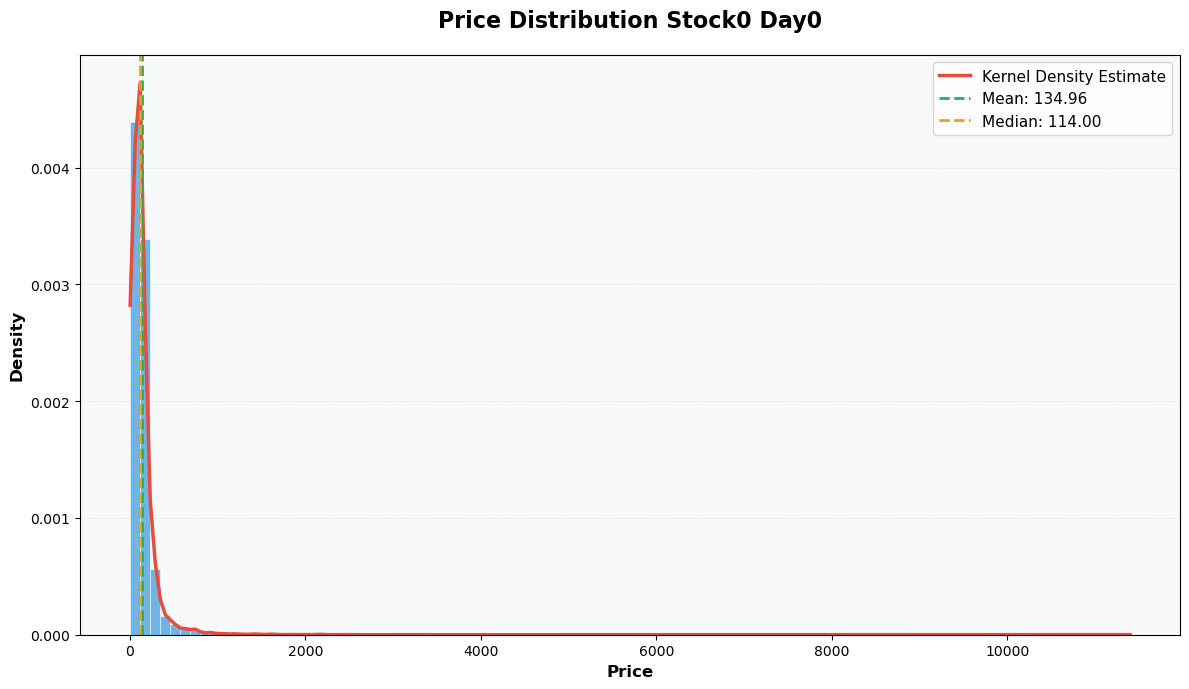

Mean: 134.9613
Median: 114.0000
Std: 231.6046
Skewness: 20.9443
Kurtosis: 744.4865


In [22]:
fig, ax = plt.subplots(figsize=(12, 7))

n, bins, patches = ax.hist(df0['qty'], bins=100, 
                           density=True, alpha=0.7, 
                           color='#3498DB', edgecolor='white', linewidth=0.5)

density = stats.gaussian_kde(df0['qty'])
xs = np.linspace(df0['qty'].min(), df0['qty'].max(), 200)
ax.plot(xs, density(xs), color='#E74C3C', linewidth=2.5, 
        label='Kernel Density Estimate')

mean_price = df0['qty'].mean()
median_price = df0['qty'].median()
ax.axvline(mean_price, color='#27AE60', linestyle='--', linewidth=2, 
           label=f'Mean: {mean_price:.2f}')
ax.axvline(median_price, color='#F39C12', linestyle='--', linewidth=2, 
           label=f'Median: {median_price:.2f}')

ax.set_title('Price Distribution Stock0 Day0', fontsize=16, fontweight='bold', pad=20)
ax.set_xlabel('Price', fontsize=12, fontweight='bold')
ax.set_ylabel('Density', fontsize=12, fontweight='bold')

ax.grid(True, alpha=0.3, linestyle='--', linewidth=0.5, axis='y')
ax.set_facecolor('#F8F9FA')
ax.legend(fontsize=11, loc='upper right')

plt.tight_layout()
plt.show()

print(f"Mean: {mean_price:.4f}")
print(f"Median: {median_price:.4f}")
print(f"Std: {df0['qty'].std():.4f}")
print(f"Skewness: {df0['qty'].skew():.4f}")
print(f"Kurtosis: {df0['qty'].kurtosis():.4f}")

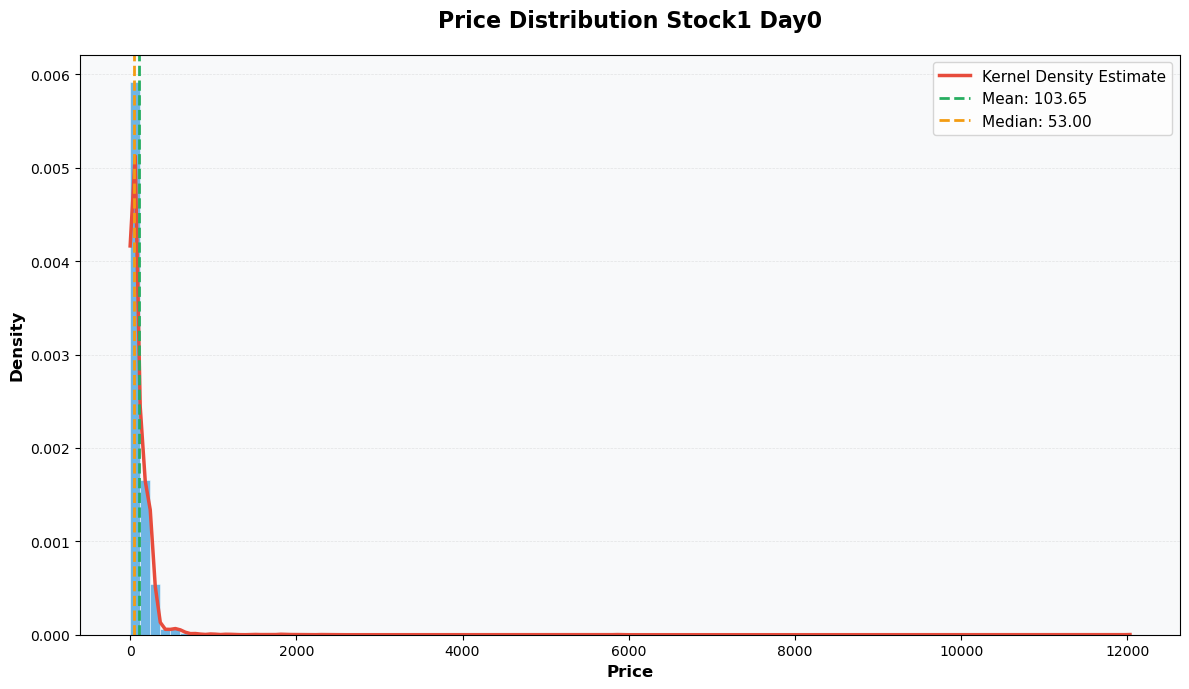

Mean: 103.6491
Median: 53.0000
Std: 233.5950
Skewness: 31.3620
Kurtosis: 1462.7883


In [49]:
fig, ax = plt.subplots(figsize=(12, 7))

n, bins, patches = ax.hist(df2['qty'], bins=100, 
                           density=True, alpha=0.7, 
                           color='#3498DB', edgecolor='white', linewidth=0.5)

density = stats.gaussian_kde(df2['qty'])
xs = np.linspace(df2['qty'].min(), df2['qty'].max(), 200)
ax.plot(xs, density(xs), color='#E74C3C', linewidth=2.5, 
        label='Kernel Density Estimate')

mean_price = df2['qty'].mean()
median_price = df2['qty'].median()
ax.axvline(mean_price, color='#27AE60', linestyle='--', linewidth=2, 
           label=f'Mean: {mean_price:.2f}')
ax.axvline(median_price, color='#F39C12', linestyle='--', linewidth=2, 
           label=f'Median: {median_price:.2f}')

ax.set_title('Price Distribution Stock1 Day0', fontsize=16, fontweight='bold', pad=20)
ax.set_xlabel('Price', fontsize=12, fontweight='bold')
ax.set_ylabel('Density', fontsize=12, fontweight='bold')

ax.grid(True, alpha=0.3, linestyle='--', linewidth=0.5, axis='y')
ax.set_facecolor('#F8F9FA')
ax.legend(fontsize=11, loc='upper right')

plt.tight_layout()
plt.show()

print(f"Mean: {mean_price:.4f}")
print(f"Median: {median_price:.4f}")
print(f"Std: {df2['qty'].std():.4f}")
print(f"Skewness: {df2['qty'].skew():.4f}")
print(f"Kurtosis: {df2['qty'].kurtosis():.4f}")

## 1.2 Tick size

Tick size is defined as the minimum increment in the price of an asset

In [23]:
tick_size = df0['price'].diff().abs().replace(0, np.nan).min()
print(f"Tick size: {tick_size}")

Tick size: 0.00999999999999801


To verify if we computed the right number we check that all prices variations are multiple of the tick

In [24]:
price_changes = df0['price'].diff().dropna()
non_zero_changes = price_changes[price_changes != 0]

multiples = non_zero_changes / tick_size
is_valid = np.allclose(multiples, multiples.round(), rtol=1e-5)

print(f"Tick size valide: {is_valid}")
print(f"Exemples de multiples: {multiples.head()}")

Tick size valide: True
Exemples de multiples: ts
2026-01-26 09:00:27.041728   -3.0
2026-01-26 09:00:27.072145   -2.0
2026-01-26 09:00:27.085654    2.0
2026-01-26 09:00:27.336066   -1.0
2026-01-26 09:00:27.336175   -1.0
Name: price, dtype: float64


## 1.3 Intraday activity

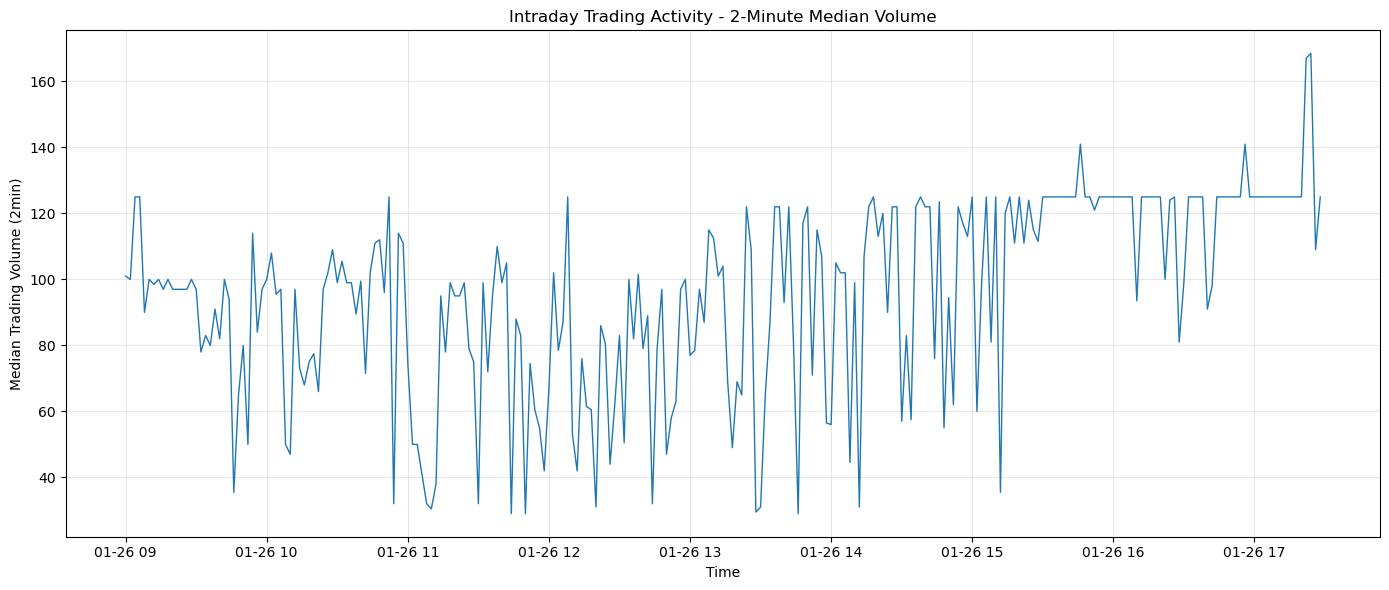

In [25]:
volume_2min = df0['qty'].resample('2min').median()

plt.figure(figsize=(14, 6))
plt.plot(volume_2min.index, volume_2min.values, linewidth=1)
plt.xlabel('Time')
plt.ylabel('Median Trading Volume (2min)')
plt.title('Intraday Trading Activity - 2-Minute Median Volume')
plt.grid(True, alpha=0.3)
plt.tight_layout()
plt.show()

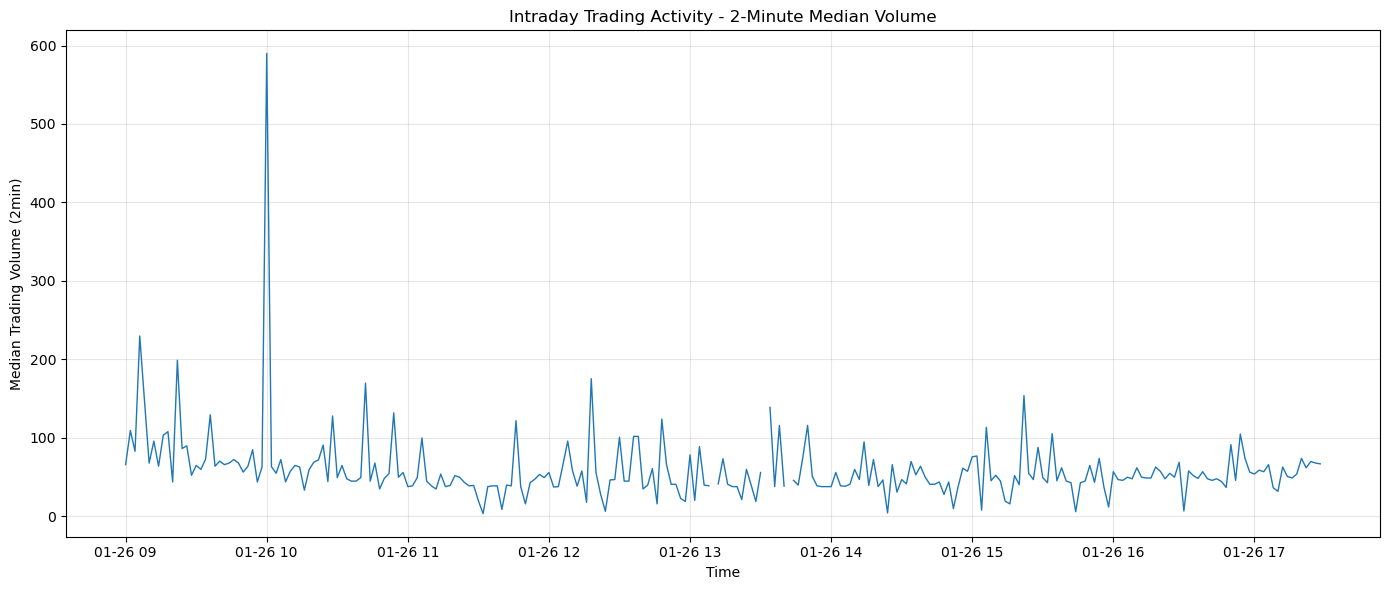

In [26]:
volume_2min = df2['qty'].resample('2min').median()

plt.figure(figsize=(14, 6))
plt.plot(volume_2min.index, volume_2min.values, linewidth=1)
plt.xlabel('Time')
plt.ylabel('Median Trading Volume (2min)')
plt.title('Intraday Trading Activity - 2-Minute Median Volume')
plt.grid(True, alpha=0.3)
plt.tight_layout()
plt.show()

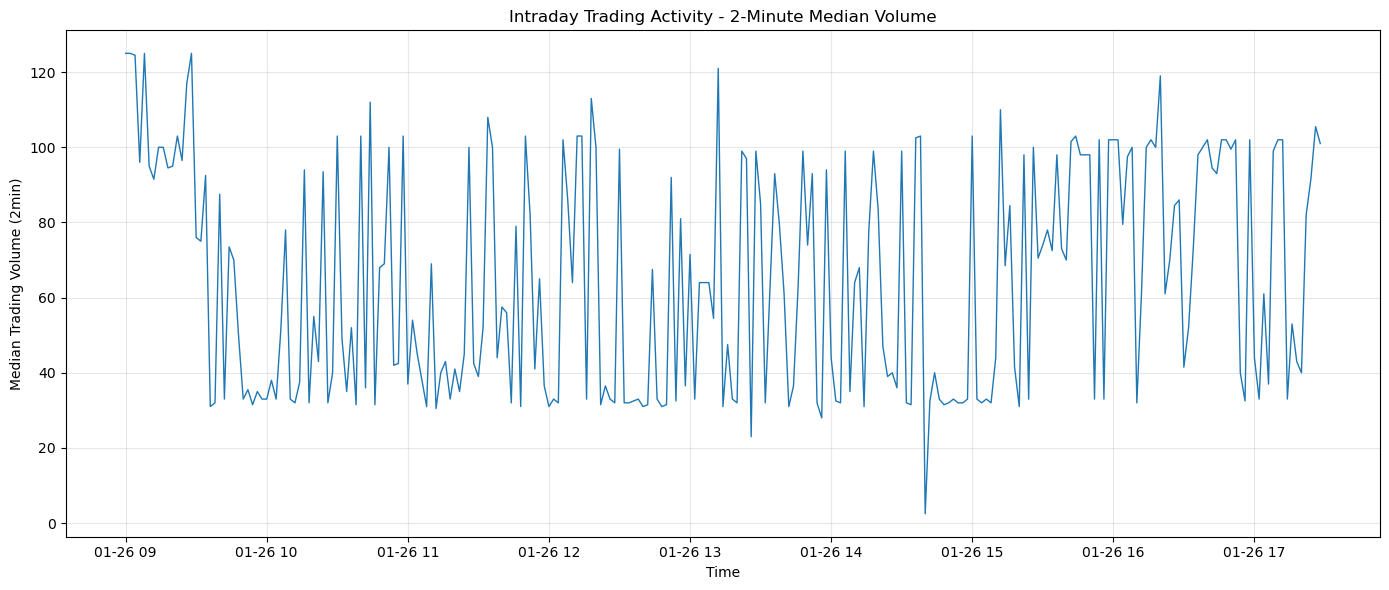

In [27]:
volume_2min = df3['qty'].resample('2min').median()

plt.figure(figsize=(14, 6))
plt.plot(volume_2min.index, volume_2min.values, linewidth=1)
plt.xlabel('Time')
plt.ylabel('Median Trading Volume (2min)')
plt.title('Intraday Trading Activity - 2-Minute Median Volume')
plt.grid(True, alpha=0.3)
plt.tight_layout()
plt.show()

We see that the curve depend on the stock. We do not clearly retrieve the U-Shape expected and for european stock we do not clearly see the opening of American Market

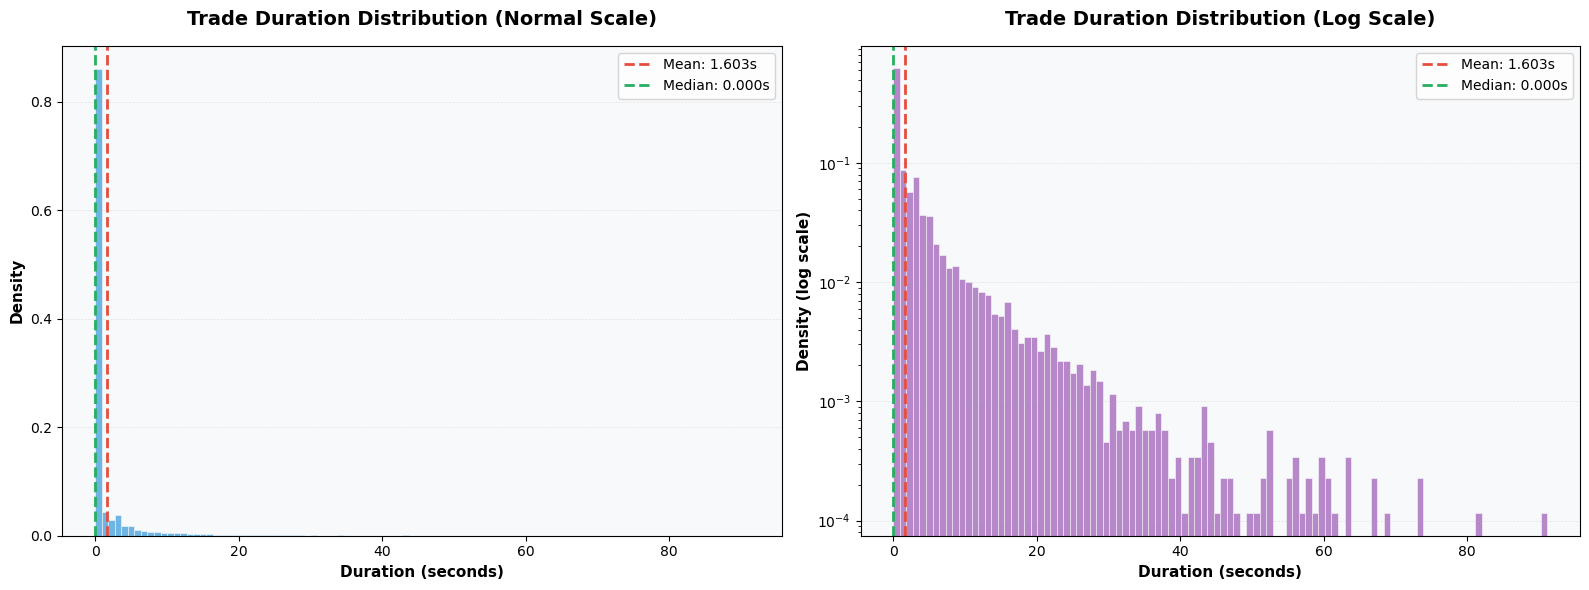

=== Trade Duration Statistics ===
Mean: 1.602709 seconds
Median: 0.000008 seconds
Std: 5.077909 seconds
Min: 0.000000 seconds
Max: 91.165176 seconds

Quantiles:
0.25     0.000000
0.50     0.000008
0.75     0.334105
0.95     9.511165
0.99    25.061209
Name: ts, dtype: float64


In [ ]:
trade_durations = df0.index.to_series().diff().dt.total_seconds()
trade_durations = trade_durations.dropna()  

fig, axes = plt.subplots(1, 2, figsize=(16, 6))

axes[0].hist(trade_durations, bins=100, density=True, 
             alpha=0.7, color='#3498DB', edgecolor='white', linewidth=0.5)

mean_duration = trade_durations.mean()
median_duration = trade_durations.median()
axes[0].axvline(mean_duration, color='#E74C3C', linestyle='--', 
                linewidth=2, label=f'Mean: {mean_duration:.3f}s')
axes[0].axvline(median_duration, color='#27AE60', linestyle='--', 
                linewidth=2, label=f'Median: {median_duration:.3f}s')

axes[0].set_title('Trade Duration Distribution (Normal Scale)', 
                  fontsize=14, fontweight='bold', pad=15)
axes[0].set_xlabel('Duration (seconds)', fontsize=11, fontweight='bold')
axes[0].set_ylabel('Density', fontsize=11, fontweight='bold')
axes[0].grid(True, alpha=0.3, linestyle='--', linewidth=0.5, axis='y')
axes[0].set_facecolor('#F8F9FA')
axes[0].legend(fontsize=10)

trade_durations_pos = trade_durations[trade_durations > 0]

axes[1].hist(trade_durations_pos, bins=100, density=True, 
             alpha=0.7, color='#9B59B6', edgecolor='white', linewidth=0.5)
axes[1].set_yscale('log')

axes[1].axvline(mean_duration, color='#E74C3C', linestyle='--', 
                linewidth=2, label=f'Mean: {mean_duration:.3f}s')
axes[1].axvline(median_duration, color='#27AE60', linestyle='--', 
                linewidth=2, label=f'Median: {median_duration:.3f}s')

axes[1].set_title('Trade Duration Distribution (Log Scale)', 
                  fontsize=14, fontweight='bold', pad=15)
axes[1].set_xlabel('Duration (seconds)', fontsize=11, fontweight='bold')
axes[1].set_ylabel('Density (log scale)', fontsize=11, fontweight='bold')
axes[1].grid(True, alpha=0.3, linestyle='--', linewidth=0.5, axis='y')
axes[1].set_facecolor('#F8F9FA')
axes[1].legend(fontsize=10)

plt.tight_layout()
plt.show()

print("=== Trade Duration Statistics ===")
print(f"Mean: {mean_duration:.6f} seconds")
print(f"Median: {median_duration:.6f} seconds")
print(f"Std: {trade_durations.std():.6f} seconds")
print(f"Min: {trade_durations.min():.6f} seconds")
print(f"Max: {trade_durations.max():.6f} seconds")
print(f"\nQuantiles:")
print(trade_durations.quantile([0.25, 0.5, 0.75, 0.95, 0.99]))

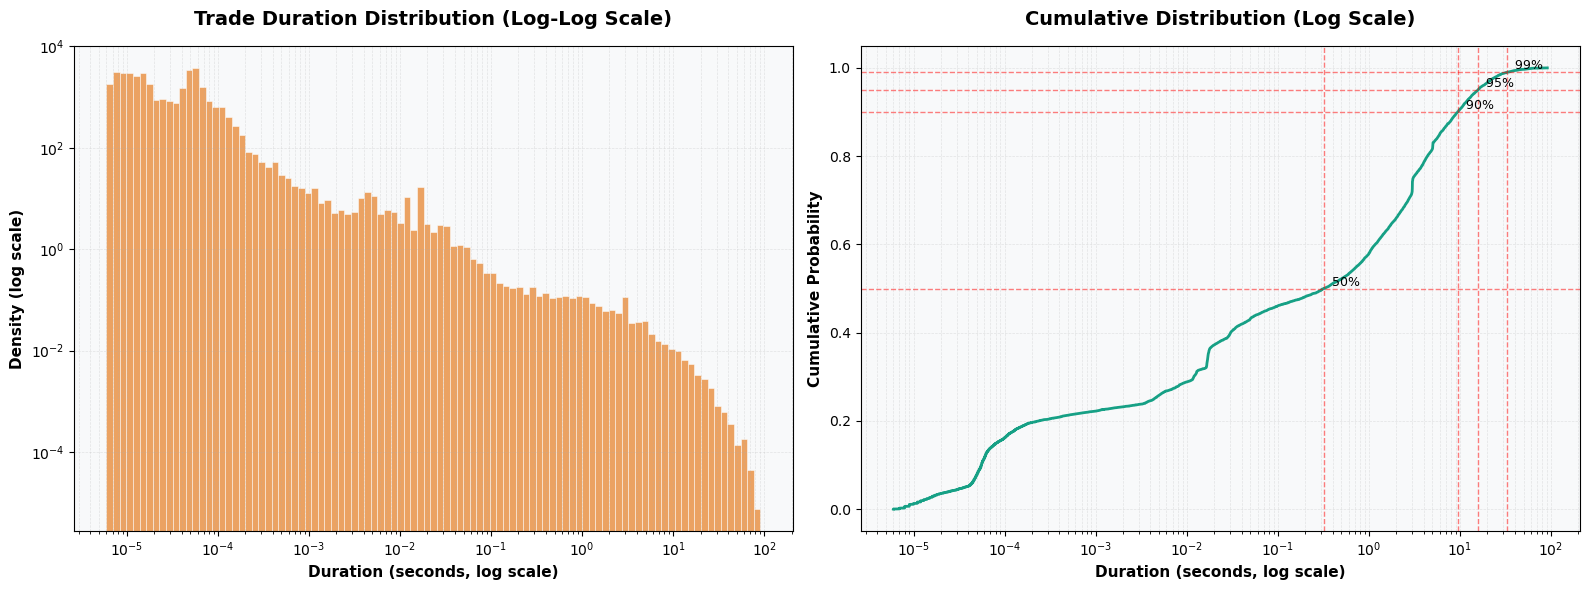

In [ ]:
fig, axes = plt.subplots(1, 2, figsize=(16, 6))

trade_durations_pos = trade_durations[trade_durations > 0]

axes[0].hist(trade_durations_pos, bins=np.logspace(np.log10(trade_durations_pos.min()),
                                                     np.log10(trade_durations_pos.max()), 
                                                     100),
             density=True, alpha=0.7, color='#E67E22', edgecolor='white', linewidth=0.5)
axes[0].set_xscale('log')
axes[0].set_yscale('log')
axes[0].set_title('Trade Duration Distribution (Log-Log Scale)', 
                  fontsize=14, fontweight='bold', pad=15)
axes[0].set_xlabel('Duration (seconds, log scale)', fontsize=11, fontweight='bold')
axes[0].set_ylabel('Density (log scale)', fontsize=11, fontweight='bold')
axes[0].grid(True, alpha=0.3, which='both', linestyle='--', linewidth=0.5)
axes[0].set_facecolor('#F8F9FA')

sorted_durations = np.sort(trade_durations_pos)
cumulative = np.arange(1, len(sorted_durations) + 1) / len(sorted_durations)

axes[1].plot(sorted_durations, cumulative, linewidth=2, color='#16A085')
axes[1].set_xscale('log')
axes[1].set_title('Cumulative Distribution (Log Scale)', 
                  fontsize=14, fontweight='bold', pad=15)
axes[1].set_xlabel('Duration (seconds, log scale)', fontsize=11, fontweight='bold')
axes[1].set_ylabel('Cumulative Probability', fontsize=11, fontweight='bold')
axes[1].grid(True, alpha=0.3, which='both', linestyle='--', linewidth=0.5)
axes[1].set_facecolor('#F8F9FA')

for p in [0.5, 0.9, 0.95, 0.99]:
    val = np.percentile(sorted_durations, p * 100)
    axes[1].axhline(p, color='red', linestyle='--', alpha=0.5, linewidth=1)
    axes[1].axvline(val, color='red', linestyle='--', alpha=0.5, linewidth=1)
    axes[1].text(val, p, f'  {p*100:.0f}%', fontsize=9, va='bottom')

plt.tight_layout()
plt.show()

Lambda (MLE): 0.007410
Mean volume: 134.96


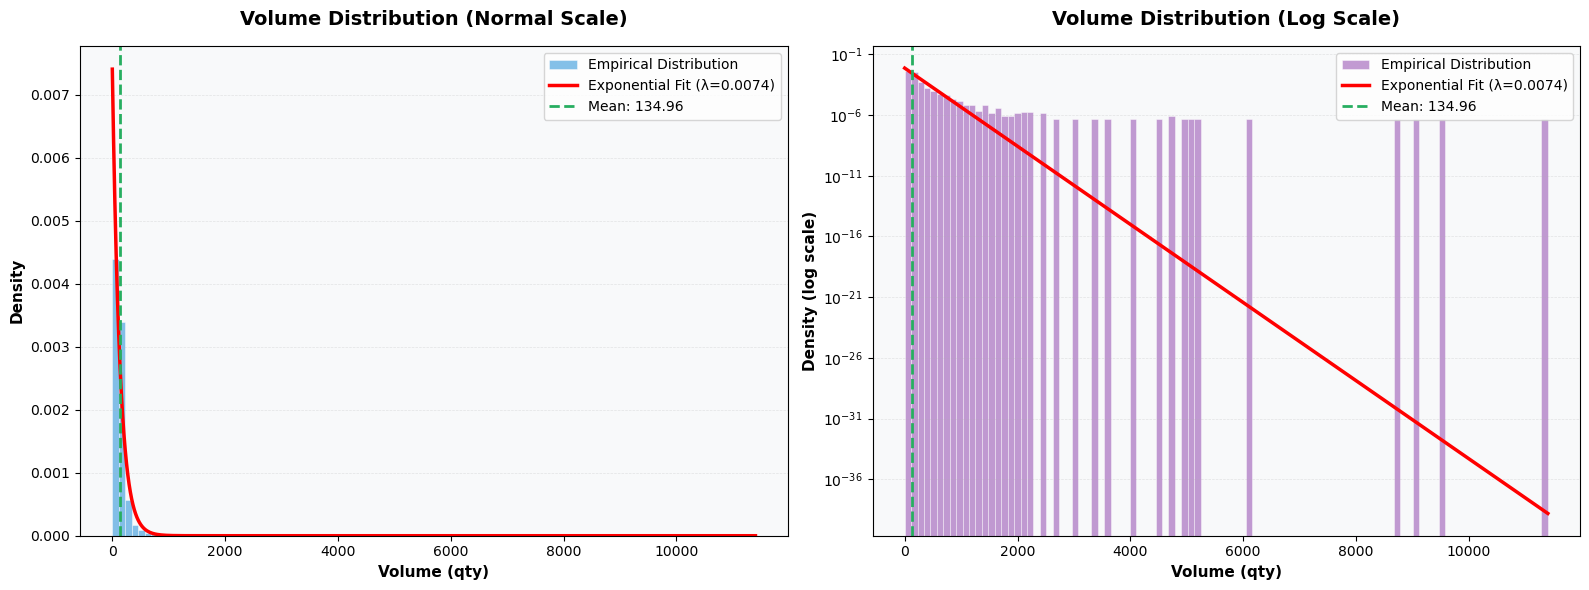

In [ ]:
def exponential_func(x, lamb, scale):
    return scale * lamb * np.exp(-lamb * x)

volumes = df0['qty'].dropna()
volumes_pos = volumes[volumes > 0] 

lamb_mle = 1 / volumes_pos.mean()  
print(f"Lambda (MLE): {lamb_mle:.6f}")
print(f"Mean volume: {volumes_pos.mean():.2f}")

fig, axes = plt.subplots(1, 2, figsize=(16, 6))

n, bins, patches = axes[0].hist(volumes_pos, bins=100, density=True, 
                                 alpha=0.6, color='#3498DB', 
                                 edgecolor='white', linewidth=0.5,
                                 label='Empirical Distribution')

x_range = np.linspace(0, volumes_pos.max(), 500)
exponential_fit = lamb_mle * np.exp(-lamb_mle * x_range)
axes[0].plot(x_range, exponential_fit, 'r-', linewidth=2.5, 
             label=f'Exponential Fit (λ={lamb_mle:.4f})')

axes[0].axvline(volumes_pos.mean(), color='#27AE60', linestyle='--', 
                linewidth=2, label=f'Mean: {volumes_pos.mean():.2f}')

axes[0].set_title('Volume Distribution (Normal Scale)', 
                  fontsize=14, fontweight='bold', pad=15)
axes[0].set_xlabel('Volume (qty)', fontsize=11, fontweight='bold')
axes[0].set_ylabel('Density', fontsize=11, fontweight='bold')
axes[0].grid(True, alpha=0.3, linestyle='--', linewidth=0.5, axis='y')
axes[0].set_facecolor('#F8F9FA')
axes[0].legend(fontsize=10)

axes[1].hist(volumes_pos, bins=100, density=True, 
             alpha=0.6, color='#9B59B6', 
             edgecolor='white', linewidth=0.5,
             label='Empirical Distribution')
axes[1].set_yscale('log')

axes[1].plot(x_range, exponential_fit, 'r-', linewidth=2.5, 
             label=f'Exponential Fit (λ={lamb_mle:.4f})')

axes[1].axvline(volumes_pos.mean(), color='#27AE60', linestyle='--', 
                linewidth=2, label=f'Mean: {volumes_pos.mean():.2f}')

axes[1].set_title('Volume Distribution (Log Scale)', 
                  fontsize=14, fontweight='bold', pad=15)
axes[1].set_xlabel('Volume (qty)', fontsize=11, fontweight='bold')
axes[1].set_ylabel('Density (log scale)', fontsize=11, fontweight='bold')
axes[1].grid(True, alpha=0.3, linestyle='--', linewidth=0.5, axis='y')
axes[1].set_facecolor('#F8F9FA')
axes[1].legend(fontsize=10)

plt.tight_layout()
plt.show()

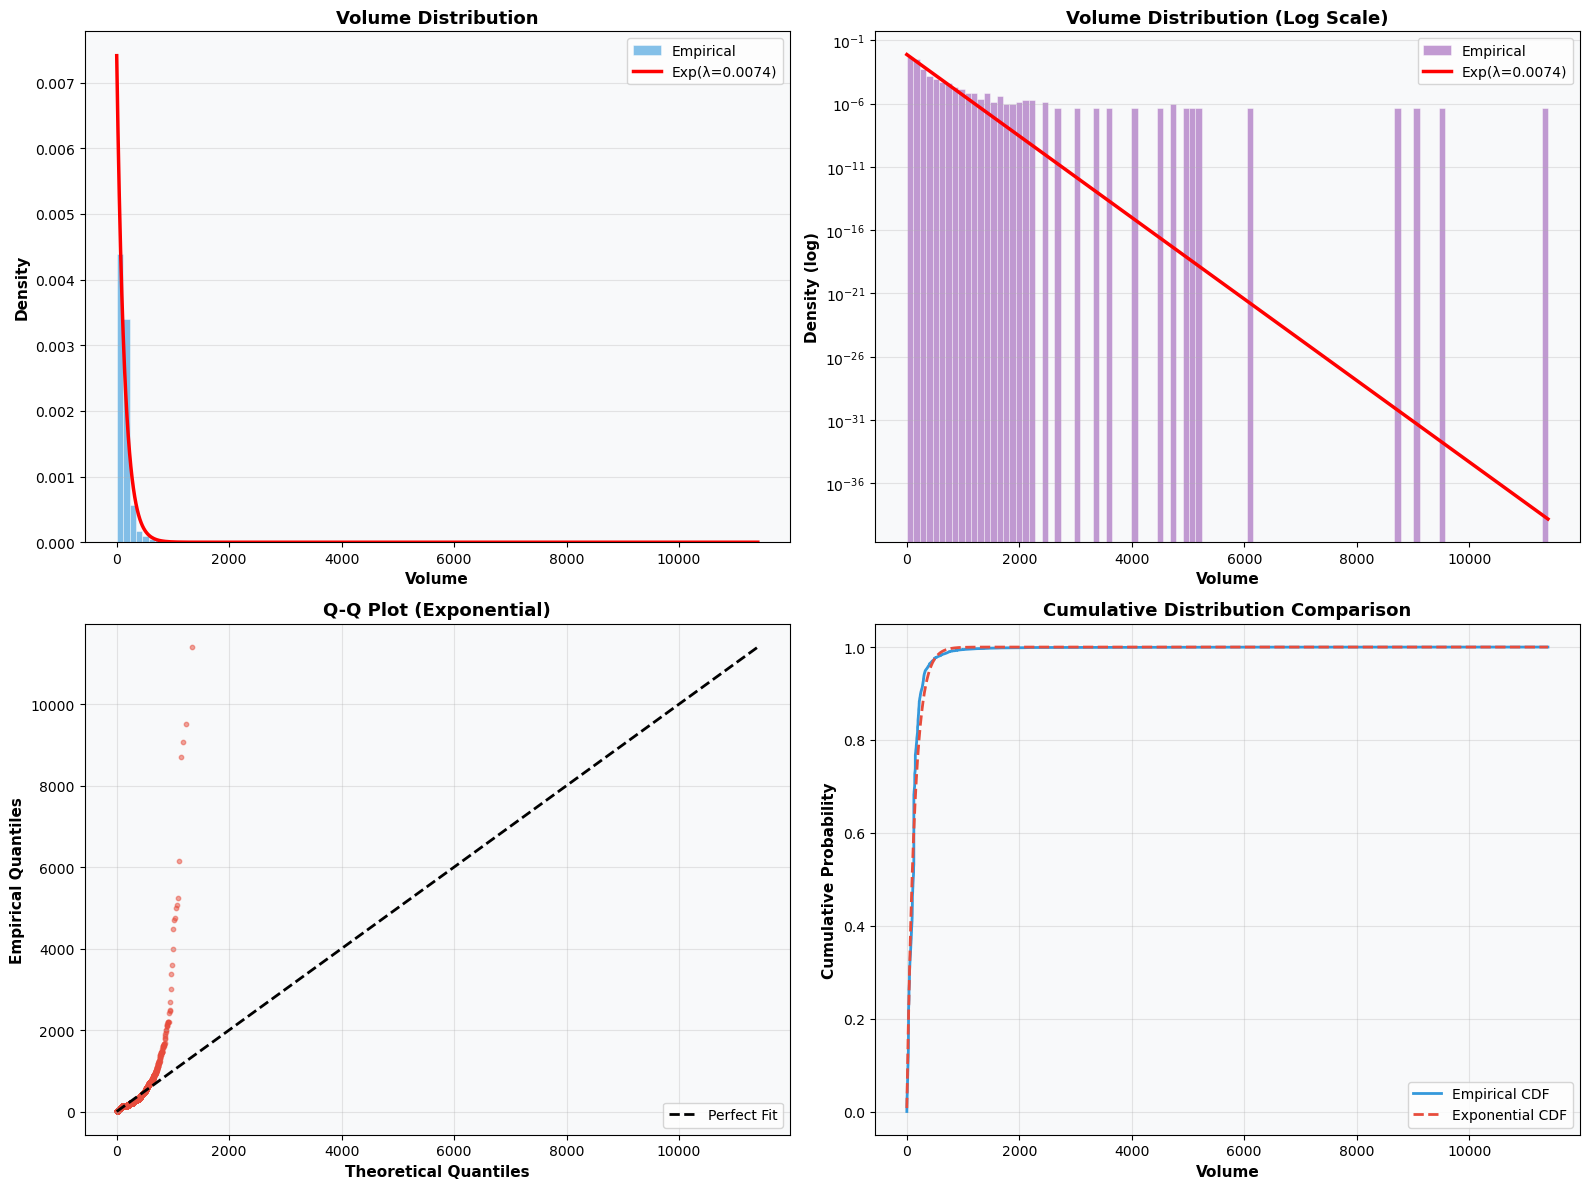


=== Goodness of Fit Statistics ===
Lambda (rate parameter): 0.007410
Mean (1/λ): 134.96
Empirical mean: 134.96

Kolmogorov-Smirnov Test:
  KS Statistic: 0.092752
  P-value: 0.000000
  → Reject exponential distribution (poor fit)


In [ ]:
fig, axes = plt.subplots(2, 2, figsize=(16, 12))

axes[0, 0].hist(volumes_pos, bins=100, density=True, 
                alpha=0.6, color='#3498DB', edgecolor='white', linewidth=0.5,
                label='Empirical')
x_range = np.linspace(0, volumes_pos.max(), 500)
axes[0, 0].plot(x_range, lamb_mle * np.exp(-lamb_mle * x_range), 
                'r-', linewidth=2.5, label=f'Exp(λ={lamb_mle:.4f})')
axes[0, 0].set_title('Volume Distribution', fontsize=13, fontweight='bold')
axes[0, 0].set_xlabel('Volume', fontsize=11, fontweight='bold')
axes[0, 0].set_ylabel('Density', fontsize=11, fontweight='bold')
axes[0, 0].legend()
axes[0, 0].grid(True, alpha=0.3, axis='y')
axes[0, 0].set_facecolor('#F8F9FA')

axes[0, 1].hist(volumes_pos, bins=100, density=True, 
                alpha=0.6, color='#9B59B6', edgecolor='white', linewidth=0.5,
                label='Empirical')
axes[0, 1].plot(x_range, lamb_mle * np.exp(-lamb_mle * x_range), 
                'r-', linewidth=2.5, label=f'Exp(λ={lamb_mle:.4f})')
axes[0, 1].set_yscale('log')
axes[0, 1].set_title('Volume Distribution (Log Scale)', fontsize=13, fontweight='bold')
axes[0, 1].set_xlabel('Volume', fontsize=11, fontweight='bold')
axes[0, 1].set_ylabel('Density (log)', fontsize=11, fontweight='bold')
axes[0, 1].legend()
axes[0, 1].grid(True, alpha=0.3, axis='y')
axes[0, 1].set_facecolor('#F8F9FA')

sorted_volumes = np.sort(volumes_pos)
n_points = len(sorted_volumes)
theoretical_quantiles = -np.log(1 - np.arange(1, n_points + 1) / (n_points + 1)) / lamb_mle

axes[1, 0].scatter(theoretical_quantiles, sorted_volumes, alpha=0.5, s=10, color='#E74C3C')

max_val = max(theoretical_quantiles.max(), sorted_volumes.max())
axes[1, 0].plot([0, max_val], [0, max_val], 'k--', linewidth=2, label='Perfect Fit')
axes[1, 0].set_title('Q-Q Plot (Exponential)', fontsize=13, fontweight='bold')
axes[1, 0].set_xlabel('Theoretical Quantiles', fontsize=11, fontweight='bold')
axes[1, 0].set_ylabel('Empirical Quantiles', fontsize=11, fontweight='bold')
axes[1, 0].legend()
axes[1, 0].grid(True, alpha=0.3)
axes[1, 0].set_facecolor('#F8F9FA')

empirical_cdf = np.arange(1, n_points + 1) / n_points
theoretical_cdf = 1 - np.exp(-lamb_mle * sorted_volumes)

axes[1, 1].plot(sorted_volumes, empirical_cdf, linewidth=2, 
                color='#3498DB', label='Empirical CDF')
axes[1, 1].plot(sorted_volumes, theoretical_cdf, linewidth=2, 
                color='#E74C3C', linestyle='--', label='Exponential CDF')
axes[1, 1].set_title('Cumulative Distribution Comparison', fontsize=13, fontweight='bold')
axes[1, 1].set_xlabel('Volume', fontsize=11, fontweight='bold')
axes[1, 1].set_ylabel('Cumulative Probability', fontsize=11, fontweight='bold')
axes[1, 1].legend()
axes[1, 1].grid(True, alpha=0.3)
axes[1, 1].set_facecolor('#F8F9FA')

plt.tight_layout()
plt.show()

ks_statistic, ks_pvalue = stats.kstest(volumes_pos, 
                                        lambda x: stats.expon.cdf(x, scale=1/lamb_mle))

print("\n=== Goodness of Fit Statistics ===")
print(f"Lambda (rate parameter): {lamb_mle:.6f}")
print(f"Mean (1/λ): {1/lamb_mle:.2f}")
print(f"Empirical mean: {volumes_pos.mean():.2f}")
print(f"\nKolmogorov-Smirnov Test:")
print(f"  KS Statistic: {ks_statistic:.6f}")
print(f"  P-value: {ks_pvalue:.6f}")
if ks_pvalue > 0.05:
    print("  → Cannot reject exponential distribution (good fit)")
else:
    print("  → Reject exponential distribution (poor fit)")

## 1.4 Volatility and traded volume

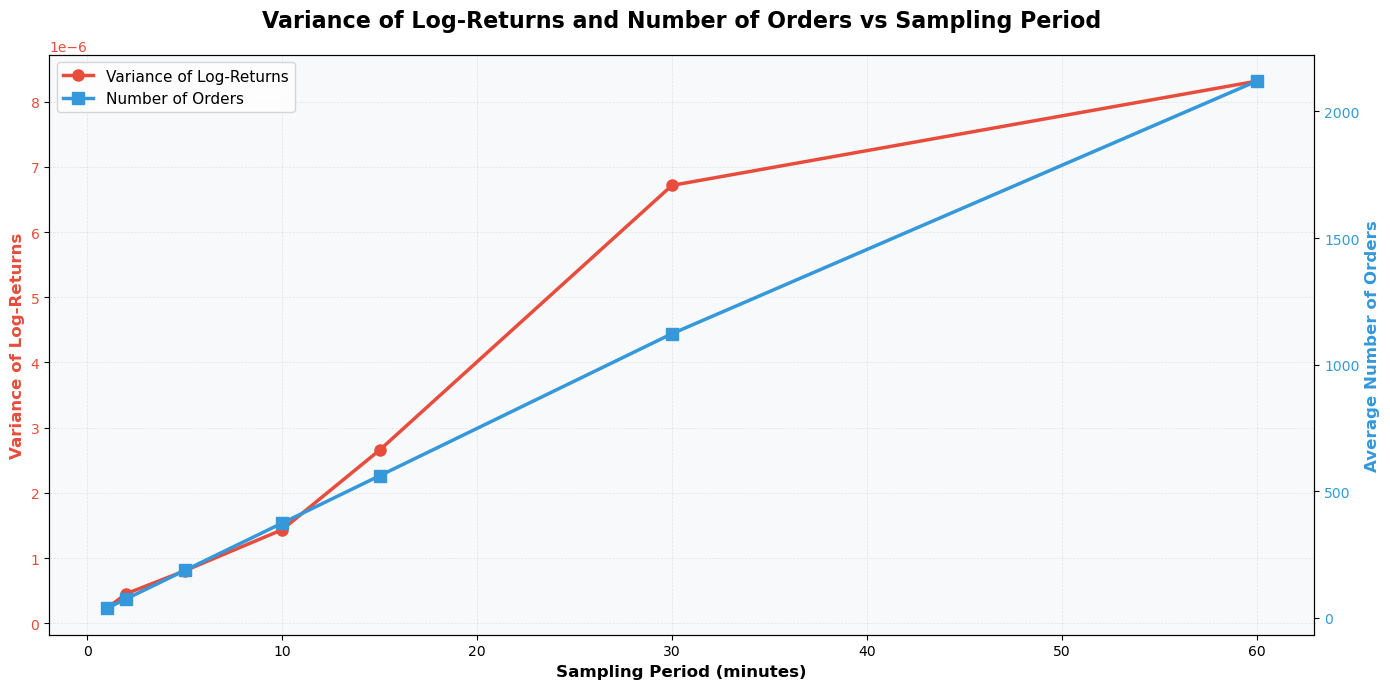

=== Variance and Number of Orders by Sampling Period ===
  1 min: Variance = 0.00000023, Avg # Orders = 37.48
  2 min: Variance = 0.00000045, Avg # Orders = 74.81
  5 min: Variance = 0.00000081, Avg # Orders = 187.02
 10 min: Variance = 0.00000144, Avg # Orders = 374.04
 15 min: Variance = 0.00000266, Avg # Orders = 561.06
 30 min: Variance = 0.00000672, Avg # Orders = 1122.12
 60 min: Variance = 0.00000831, Avg # Orders = 2119.56


In [ ]:
df0['log_price'] = np.log(df0['price'])
df0['log_return'] = df0['log_price'].diff()

sampling_periods = [1, 2, 5, 10, 15, 30, 60]  
variances = []
num_orders = []

for period in sampling_periods:
    resampled = df0.resample(f'{period}min').agg({
        'log_price': 'last',
        'qty': 'count'  
    }).dropna()
    
    resampled_log_returns = resampled['log_price'].diff().dropna()
    var = resampled_log_returns.var()
    variances.append(var)

    avg_num_orders = resampled['qty'].mean()
    num_orders.append(avg_num_orders)

fig, ax1 = plt.subplots(figsize=(14, 7))

color1 = '#E74C3C'
ax1.set_xlabel('Sampling Period (minutes)', fontsize=12, fontweight='bold')
ax1.set_ylabel('Variance of Log-Returns', fontsize=12, fontweight='bold', color=color1)
line1 = ax1.plot(sampling_periods, variances, 'o-', color=color1, 
                 linewidth=2.5, markersize=8, label='Variance of Log-Returns')
ax1.tick_params(axis='y', labelcolor=color1)
ax1.grid(True, alpha=0.3, linestyle='--', linewidth=0.5)
ax1.set_facecolor('#F8F9FA')

ax2 = ax1.twinx()
color2 = '#3498DB'
ax2.set_ylabel('Average Number of Orders', fontsize=12, fontweight='bold', color=color2)
line2 = ax2.plot(sampling_periods, num_orders, 's-', color=color2, 
                 linewidth=2.5, markersize=8, label='Number of Orders')
ax2.tick_params(axis='y', labelcolor=color2)

plt.title('Variance of Log-Returns and Number of Orders vs Sampling Period', 
          fontsize=16, fontweight='bold', pad=20)

lines = line1 + line2
labels = [l.get_label() for l in lines]
ax1.legend(lines, labels, loc='upper left', fontsize=11)

plt.tight_layout()
plt.show()

print("=== Variance and Number of Orders by Sampling Period ===")
for period, var, n_ord in zip(sampling_periods, variances, num_orders):
    print(f"{period:3d} min: Variance = {var:.8f}, Avg # Orders = {n_ord:.2f}")

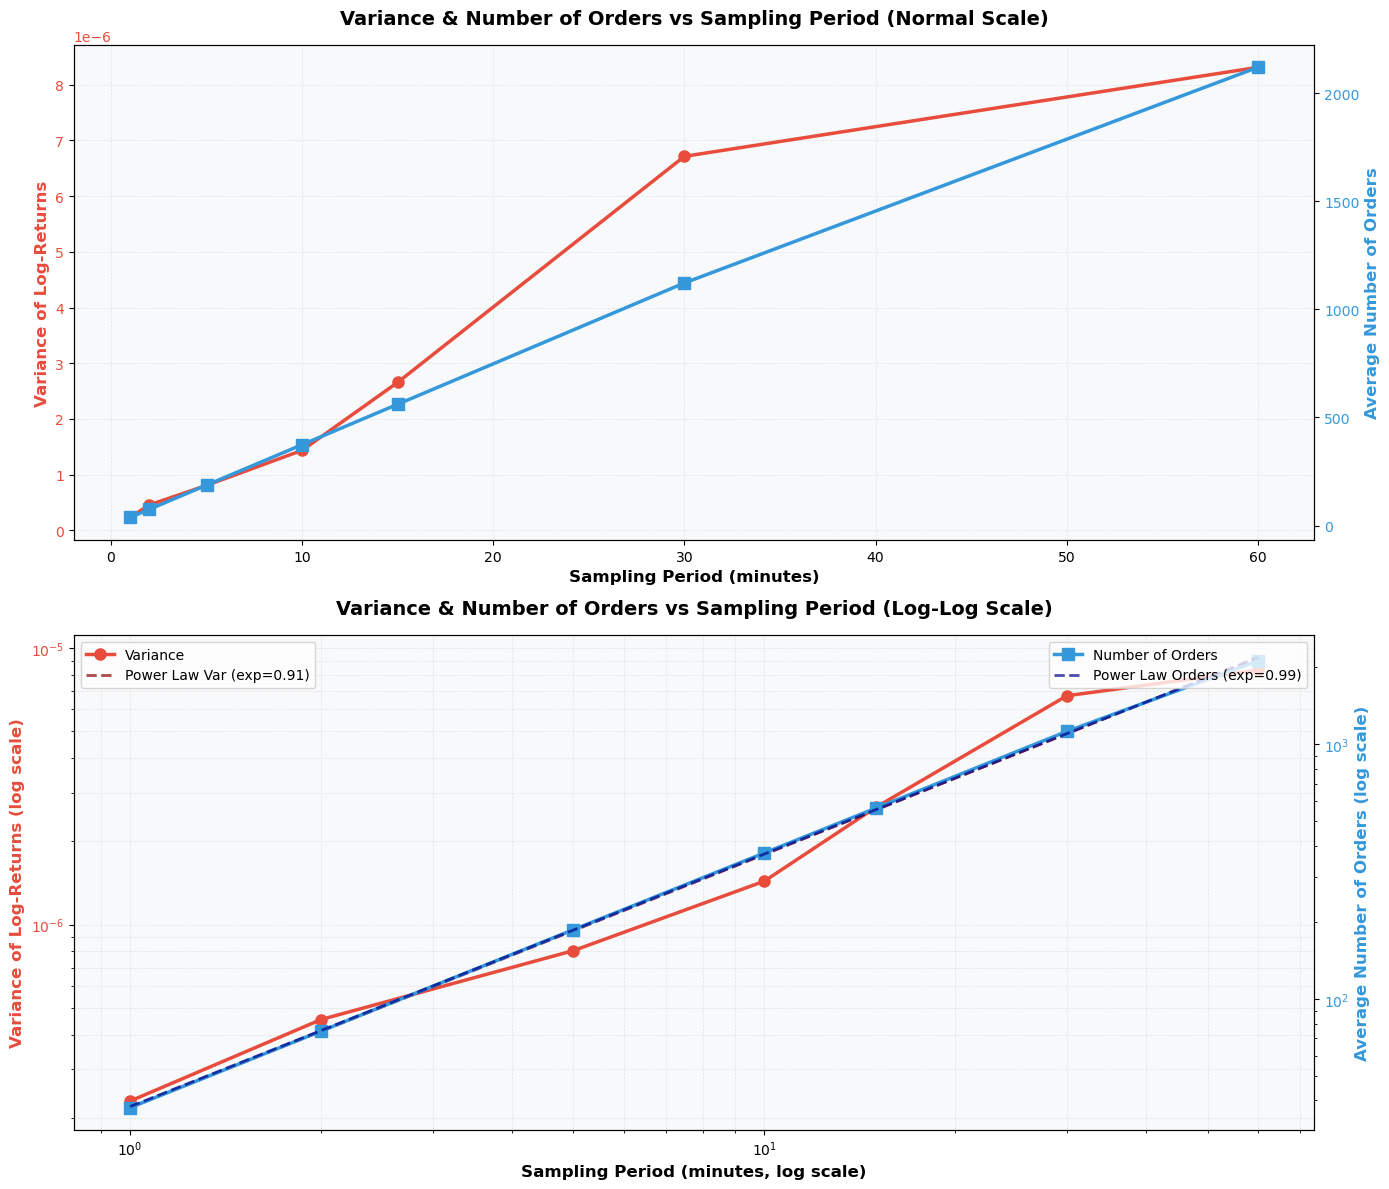


=== Power Law Analysis ===
Variance ~ Period^0.915
Number of Orders ~ Period^0.991

Variance Interpretation:
  → Close to linear scaling (Brownian motion behavior)

Orders Interpretation:
  → Linear growth: uniform order arrival rate

=== Variance and Number of Orders by Sampling Period ===
  1 min: Variance = 0.00000023, Avg # Orders = 37.48
  2 min: Variance = 0.00000045, Avg # Orders = 74.81
  5 min: Variance = 0.00000081, Avg # Orders = 187.02
 10 min: Variance = 0.00000144, Avg # Orders = 374.04
 15 min: Variance = 0.00000266, Avg # Orders = 561.06
 30 min: Variance = 0.00000672, Avg # Orders = 1122.12
 60 min: Variance = 0.00000831, Avg # Orders = 2119.56


In [ ]:
df0['log_price'] = np.log(df0['price'])
df0['log_return'] = df0['log_price'].diff()

sampling_periods = [1, 2, 5, 10, 15, 30, 60]  
variances = []
num_orders = []

for period in sampling_periods:
    resampled = df0.resample(f'{period}min').agg({
        'log_price': 'last',
        'qty': 'count'  # Compte le nombre d'ordres
    }).dropna()
    
    resampled_log_returns = resampled['log_price'].diff().dropna()
    var = resampled_log_returns.var()
    variances.append(var)

    # Nombre moyen d'ordres par période
    avg_num_orders = resampled['qty'].mean()
    num_orders.append(avg_num_orders)

fig, axes = plt.subplots(2, 1, figsize=(14, 12))

ax1 = axes[0]
color1 = '#E74C3C'
ax1.set_xlabel('Sampling Period (minutes)', fontsize=12, fontweight='bold')
ax1.set_ylabel('Variance of Log-Returns', fontsize=12, fontweight='bold', color=color1)
ax1.plot(sampling_periods, variances, 'o-', color=color1, 
         linewidth=2.5, markersize=8, label='Variance')
ax1.tick_params(axis='y', labelcolor=color1)
ax1.grid(True, alpha=0.3, linestyle='--', linewidth=0.5)
ax1.set_facecolor('#F8F9FA')

ax2 = ax1.twinx()
color2 = '#3498DB'
ax2.set_ylabel('Average Number of Orders', fontsize=12, fontweight='bold', color=color2)
ax2.plot(sampling_periods, num_orders, 's-', color=color2, 
         linewidth=2.5, markersize=8, label='Number of Orders')
ax2.tick_params(axis='y', labelcolor=color2)

ax1.set_title('Variance & Number of Orders vs Sampling Period (Normal Scale)', 
              fontsize=14, fontweight='bold', pad=15)

ax3 = axes[1]
color1 = '#E74C3C'
ax3.set_xlabel('Sampling Period (minutes, log scale)', fontsize=12, fontweight='bold')
ax3.set_ylabel('Variance of Log-Returns (log scale)', fontsize=12, fontweight='bold', color=color1)
ax3.loglog(sampling_periods, variances, 'o-', color=color1, 
           linewidth=2.5, markersize=8, label='Variance')
ax3.tick_params(axis='y', labelcolor=color1)
ax3.grid(True, alpha=0.3, linestyle='--', linewidth=0.5, which='both')
ax3.set_facecolor('#F8F9FA')

log_periods = np.log(sampling_periods)
log_variances = np.log(variances)
slope_var, intercept_var = np.polyfit(log_periods, log_variances, 1)
fit_variances = np.exp(intercept_var) * np.array(sampling_periods)**slope_var
ax3.plot(sampling_periods, fit_variances, '--', color='darkred', 
         linewidth=2, alpha=0.7, label=f'Power Law Var (exp={slope_var:.2f})')

ax4 = ax3.twinx()
color2 = '#3498DB'
ax4.set_ylabel('Average Number of Orders (log scale)', fontsize=12, fontweight='bold', color=color2)
ax4.loglog(sampling_periods, num_orders, 's-', color=color2, 
           linewidth=2.5, markersize=8, label='Number of Orders')
ax4.tick_params(axis='y', labelcolor=color2)

log_orders = np.log(num_orders)
slope_ord, intercept_ord = np.polyfit(log_periods, log_orders, 1)
fit_orders = np.exp(intercept_ord) * np.array(sampling_periods)**slope_ord
ax4.plot(sampling_periods, fit_orders, '--', color='darkblue', 
         linewidth=2, alpha=0.7, label=f'Power Law Orders (exp={slope_ord:.2f})')

ax3.set_title('Variance & Number of Orders vs Sampling Period (Log-Log Scale)', 
              fontsize=14, fontweight='bold', pad=15)

lines1, labels1 = ax3.get_legend_handles_labels()
lines2, labels2 = ax4.get_legend_handles_labels()
ax3.legend(lines1, labels1, loc='upper left', fontsize=10)
ax4.legend(lines2, labels2, loc='upper right', fontsize=10)

plt.tight_layout()
plt.show()

print(f"\n=== Power Law Analysis ===")
print(f"Variance ~ Period^{slope_var:.3f}")
print(f"Number of Orders ~ Period^{slope_ord:.3f}")
print(f"\nVariance Interpretation:")
if abs(slope_var - 1.0) < 0.1:
    print("  → Close to linear scaling (Brownian motion behavior)")
elif slope_var > 1:
    print("  → Super-diffusive behavior")
else:
    print("  → Sub-diffusive behavior")
print(f"\nOrders Interpretation:")
if abs(slope_ord - 1.0) < 0.1:
    print("  → Linear growth: uniform order arrival rate")
elif slope_ord > 1:
    print("  → Super-linear: order clustering at longer timescales")
else:
    print("  → Sub-linear: order dispersion")

print("\n=== Variance and Number of Orders by Sampling Period ===")
for period, var, n_ord in zip(sampling_periods, variances, num_orders):
    print(f"{period:3d} min: Variance = {var:.8f}, Avg # Orders = {n_ord:.2f}")

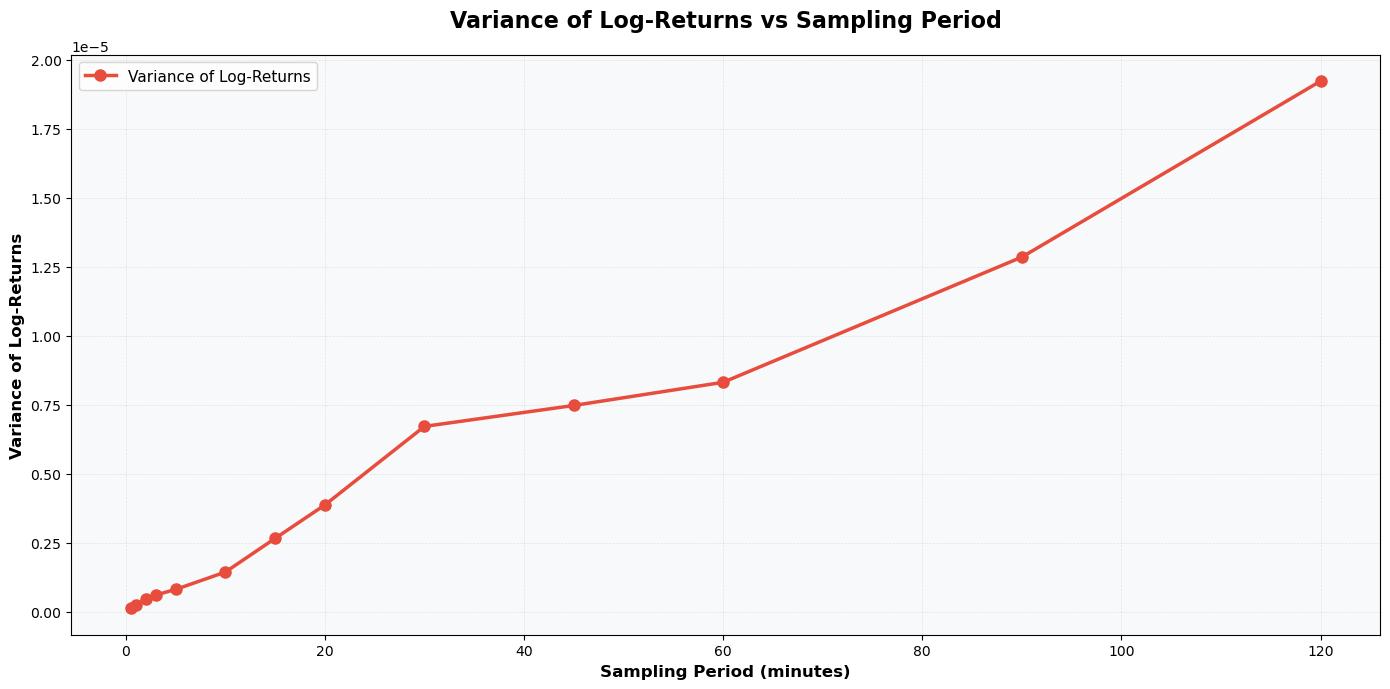

=== Variance by Sampling Period ===
   0.5 min: Variance = 0.00000012
   1.0 min: Variance = 0.00000023
   2.0 min: Variance = 0.00000045
   3.0 min: Variance = 0.00000060
   5.0 min: Variance = 0.00000081
  10.0 min: Variance = 0.00000144
  15.0 min: Variance = 0.00000266
  20.0 min: Variance = 0.00000387
  30.0 min: Variance = 0.00000672
  45.0 min: Variance = 0.00000747
  60.0 min: Variance = 0.00000831
  90.0 min: Variance = 0.00001285
 120.0 min: Variance = 0.00001923


In [ ]:
if 'log_price' not in df0.columns:
    df0['log_price'] = np.log(df0['price'])

sampling_periods = [0.5, 1, 2, 3, 5, 10, 15, 20, 30, 45, 60, 90, 120]
variances = []

for period in sampling_periods:
    if period < 1:
        freq_str = f'{int(period*60)}s'
    else:
        freq_str = f'{int(period)}min'
    
    resampled = df0['log_price'].resample(freq_str).last().dropna()
    
    if len(resampled) > 2:  
        log_returns = resampled.diff().dropna()
        var = log_returns.var()
        variances.append(var)
    else:
        variances.append(np.nan)

valid_indices = ~np.isnan(variances)
sampling_periods_clean = np.array(sampling_periods)[valid_indices]
variances_clean = np.array(variances)[valid_indices]

fig, ax = plt.subplots(figsize=(14, 7))

ax.plot(sampling_periods_clean, variances_clean, 'o-', color='#E74C3C', 
        linewidth=2.5, markersize=8, label='Variance of Log-Returns')

ax.set_title('Variance of Log-Returns vs Sampling Period', 
             fontsize=16, fontweight='bold', pad=20)
ax.set_xlabel('Sampling Period (minutes)', fontsize=12, fontweight='bold')
ax.set_ylabel('Variance of Log-Returns', fontsize=12, fontweight='bold')

ax.grid(True, alpha=0.3, linestyle='--', linewidth=0.5)
ax.set_facecolor('#F8F9FA')
ax.legend(fontsize=11)

plt.tight_layout()
plt.show()

print("=== Variance by Sampling Period ===")
for period, var in zip(sampling_periods_clean, variances_clean):
    print(f"{period:6.1f} min: Variance = {var:.8f}")

## 1.5 High Frequency Data


Sampling: 1 minutes
Event Time:    μ = 0.00002313, σ = 0.00048007
               Skewness = -0.0869
               Kurtosis = 2.1437
Calendar Time: μ = 0.00002309, σ = 0.00047913
               N_obs = 508

Sampling: 5 minutes
Event Time:    μ = 0.00012535, σ = 0.00089757
               Skewness = 0.5247
               Kurtosis = 2.1781
Calendar Time: μ = 0.00012535, σ = 0.00089312
               N_obs = 101

Sampling: 15 minutes
Event Time:    μ = 0.00031204, σ = 0.00162982
               Skewness = 0.0958
               Kurtosis = 1.2910
Calendar Time: μ = 0.00031204, σ = 0.00160494
               N_obs = 33

Sampling: 30 minutes
Event Time:    μ = 0.00054152, σ = 0.00259134
               Skewness = 0.8605
               Kurtosis = 2.4087
Calendar Time: μ = 0.00054152, σ = 0.00250906
               N_obs = 16

Sampling: 60 minutes
Event Time:    μ = 0.00015736, σ = 0.00288330
               Skewness = -0.9873
               Kurtosis = 0.7670
Calendar Time: μ = 0.00015736, σ = 0.002

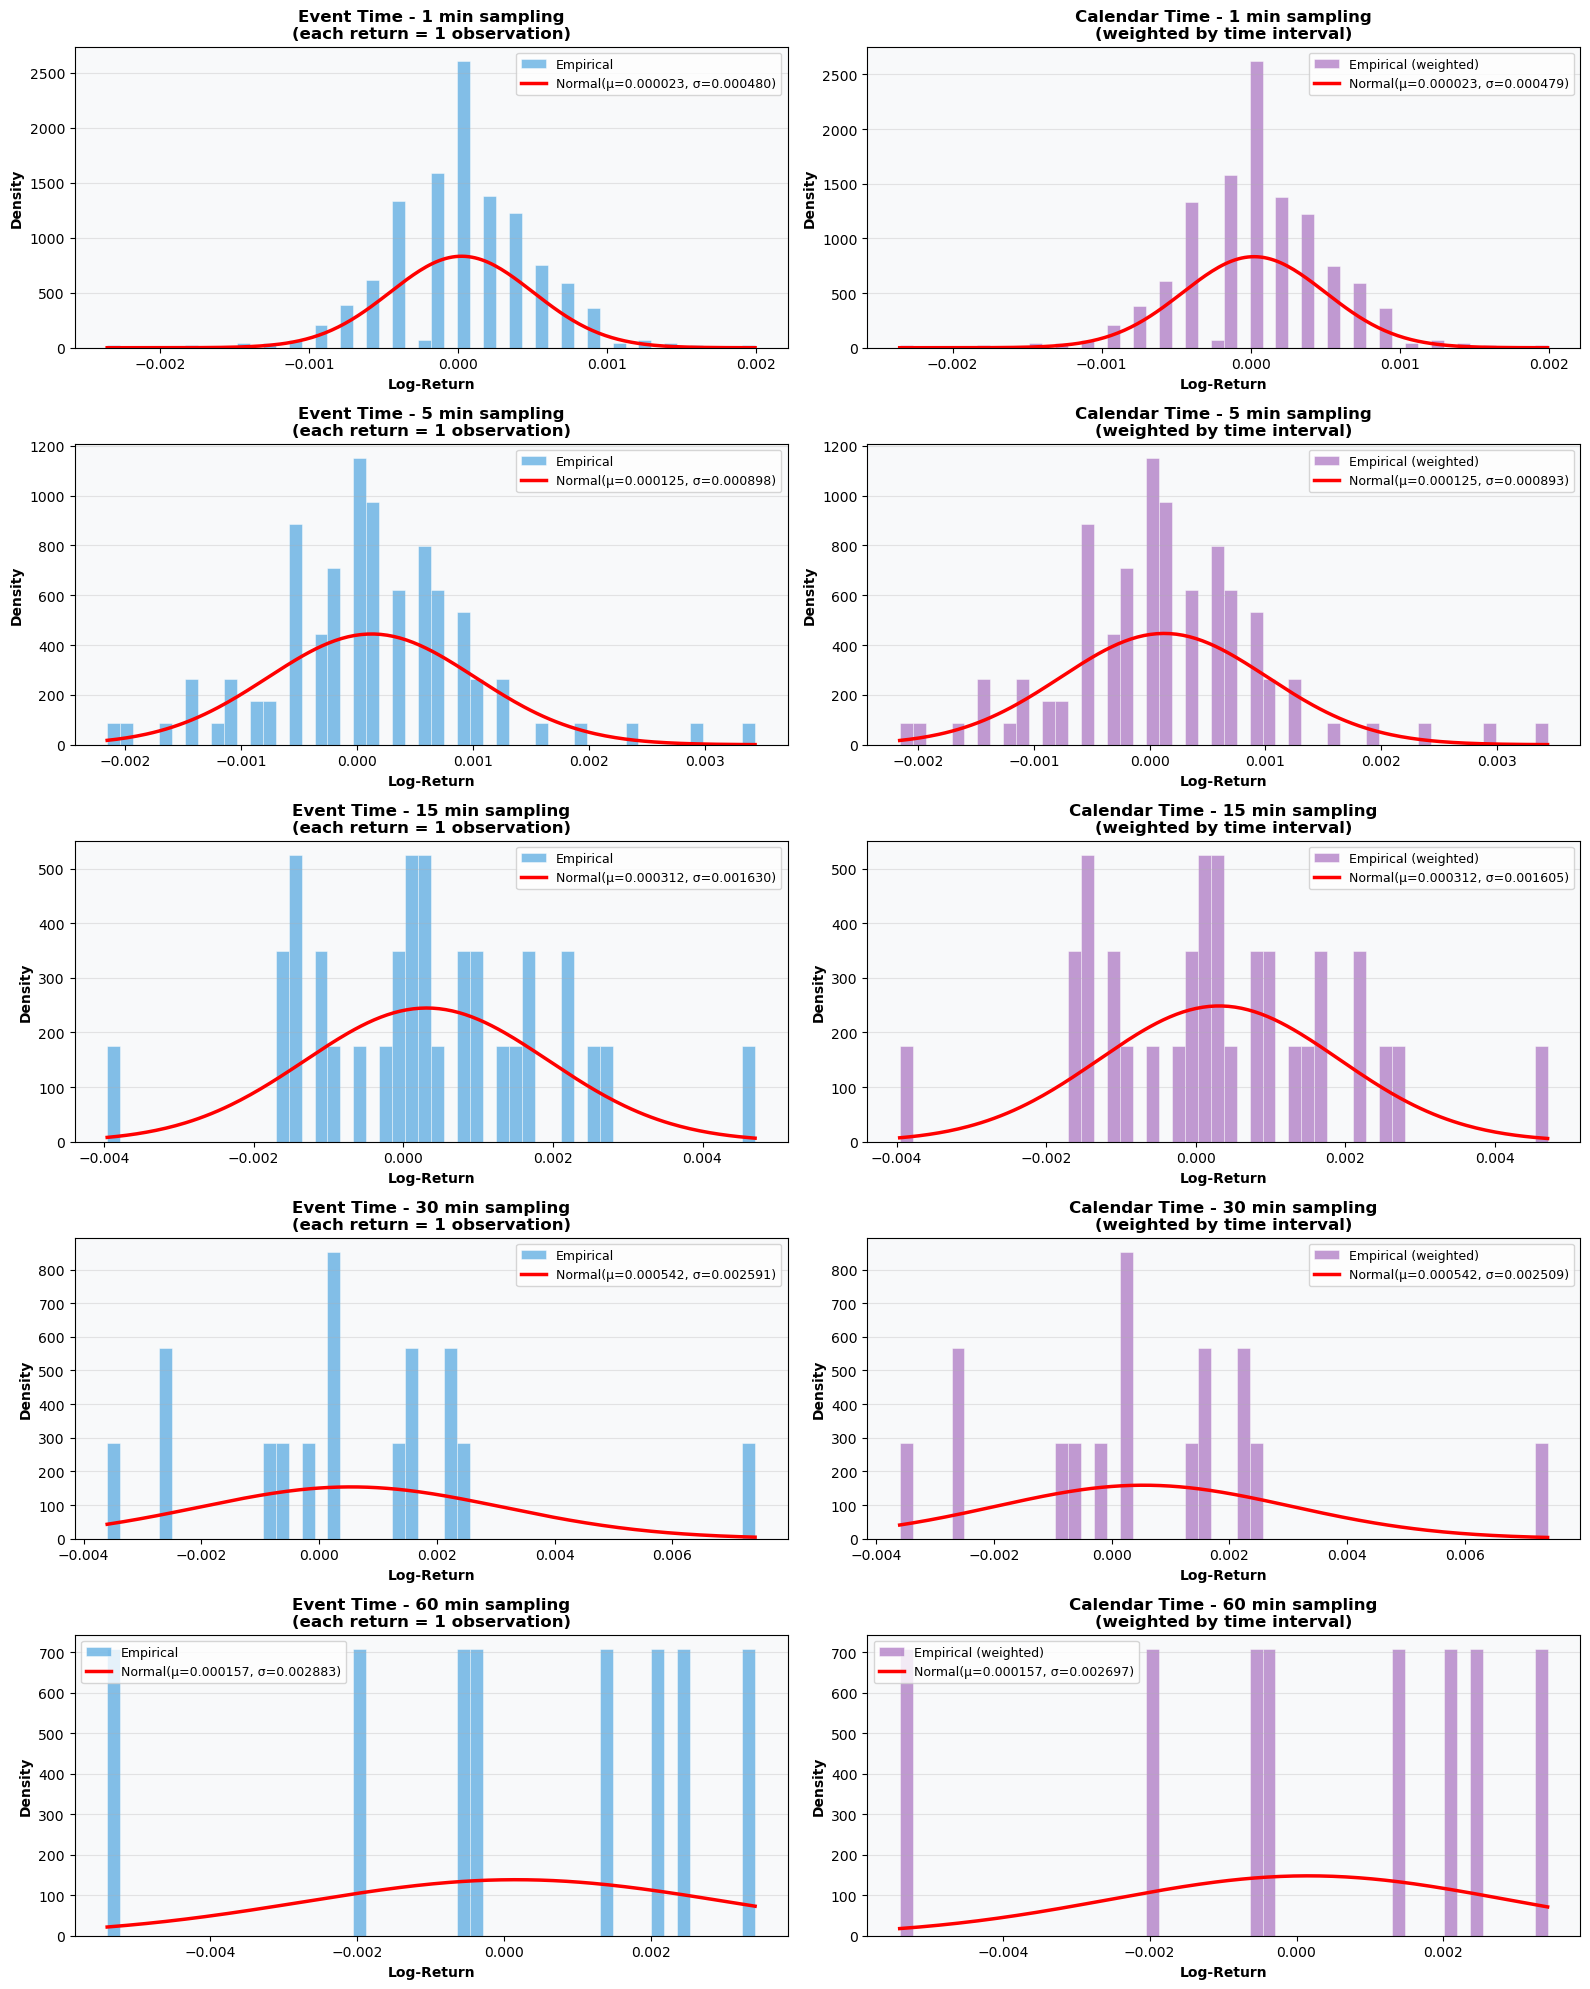

In [ ]:
sampling_freqs = [1, 5, 15, 30, 60]  

fig, axes = plt.subplots(len(sampling_freqs), 2, figsize=(16, 4*len(sampling_freqs)))

for idx, freq in enumerate(sampling_freqs):
    freq_str = f'{freq}min'
    
    resampled = df0.resample(freq_str).agg({
        'log_price': 'last'
    }).dropna()
    
    log_returns = resampled['log_price'].diff().dropna()

    ax_event = axes[idx, 0]

    n, bins, patches = ax_event.hist(log_returns, bins=50, density=True, 
                                      alpha=0.6, color='#3498DB', 
                                      edgecolor='white', linewidth=0.5,
                                      label='Empirical')
    
    mu_event, sigma_event = log_returns.mean(), log_returns.std()
    x_range = np.linspace(log_returns.min(), log_returns.max(), 200)
    normal_fit = stats.norm.pdf(x_range, mu_event, sigma_event)
    ax_event.plot(x_range, normal_fit, 'r-', linewidth=2.5, 
                  label=f'Normal(μ={mu_event:.6f}, σ={sigma_event:.6f})')
    
    ax_event.set_title(f'Event Time - {freq} min sampling\n(each return = 1 observation)', 
                       fontsize=12, fontweight='bold')
    ax_event.set_xlabel('Log-Return', fontsize=10, fontweight='bold')
    ax_event.set_ylabel('Density', fontsize=10, fontweight='bold')
    ax_event.legend(fontsize=9)
    ax_event.grid(True, alpha=0.3, axis='y')
    ax_event.set_facecolor('#F8F9FA')
    
    ax_calendar = axes[idx, 1]
    
    time_deltas = resampled.index.to_series().diff().dt.total_seconds() / 60  
    time_deltas = time_deltas[1:]  
    
    weights = time_deltas / time_deltas.sum()
    
    ax_calendar.hist(log_returns, bins=50, density=True, weights=weights,
                     alpha=0.6, color='#9B59B6', 
                     edgecolor='white', linewidth=0.5,
                     label='Empirical (weighted)')
    
    mu_calendar = np.average(log_returns, weights=weights)
    sigma_calendar = np.sqrt(np.average((log_returns - mu_calendar)**2, weights=weights))
    normal_fit_weighted = stats.norm.pdf(x_range, mu_calendar, sigma_calendar)
    ax_calendar.plot(x_range, normal_fit_weighted, 'r-', linewidth=2.5,
                     label=f'Normal(μ={mu_calendar:.6f}, σ={sigma_calendar:.6f})')
    
    ax_calendar.set_title(f'Calendar Time - {freq} min sampling\n(weighted by time interval)', 
                          fontsize=12, fontweight='bold')
    ax_calendar.set_xlabel('Log-Return', fontsize=10, fontweight='bold')
    ax_calendar.set_ylabel('Density', fontsize=10, fontweight='bold')
    ax_calendar.legend(fontsize=9)
    ax_calendar.grid(True, alpha=0.3, axis='y')
    ax_calendar.set_facecolor('#F8F9FA')
    
    print(f"\n{'='*60}")
    print(f"Sampling: {freq} minutes")
    print(f"{'='*60}")
    print(f"Event Time:    μ = {mu_event:.8f}, σ = {sigma_event:.8f}")
    print(f"               Skewness = {log_returns.skew():.4f}")
    print(f"               Kurtosis = {log_returns.kurtosis():.4f}")
    print(f"Calendar Time: μ = {mu_calendar:.8f}, σ = {sigma_calendar:.8f}")
    print(f"               N_obs = {len(log_returns)}")

plt.tight_layout()
plt.show()

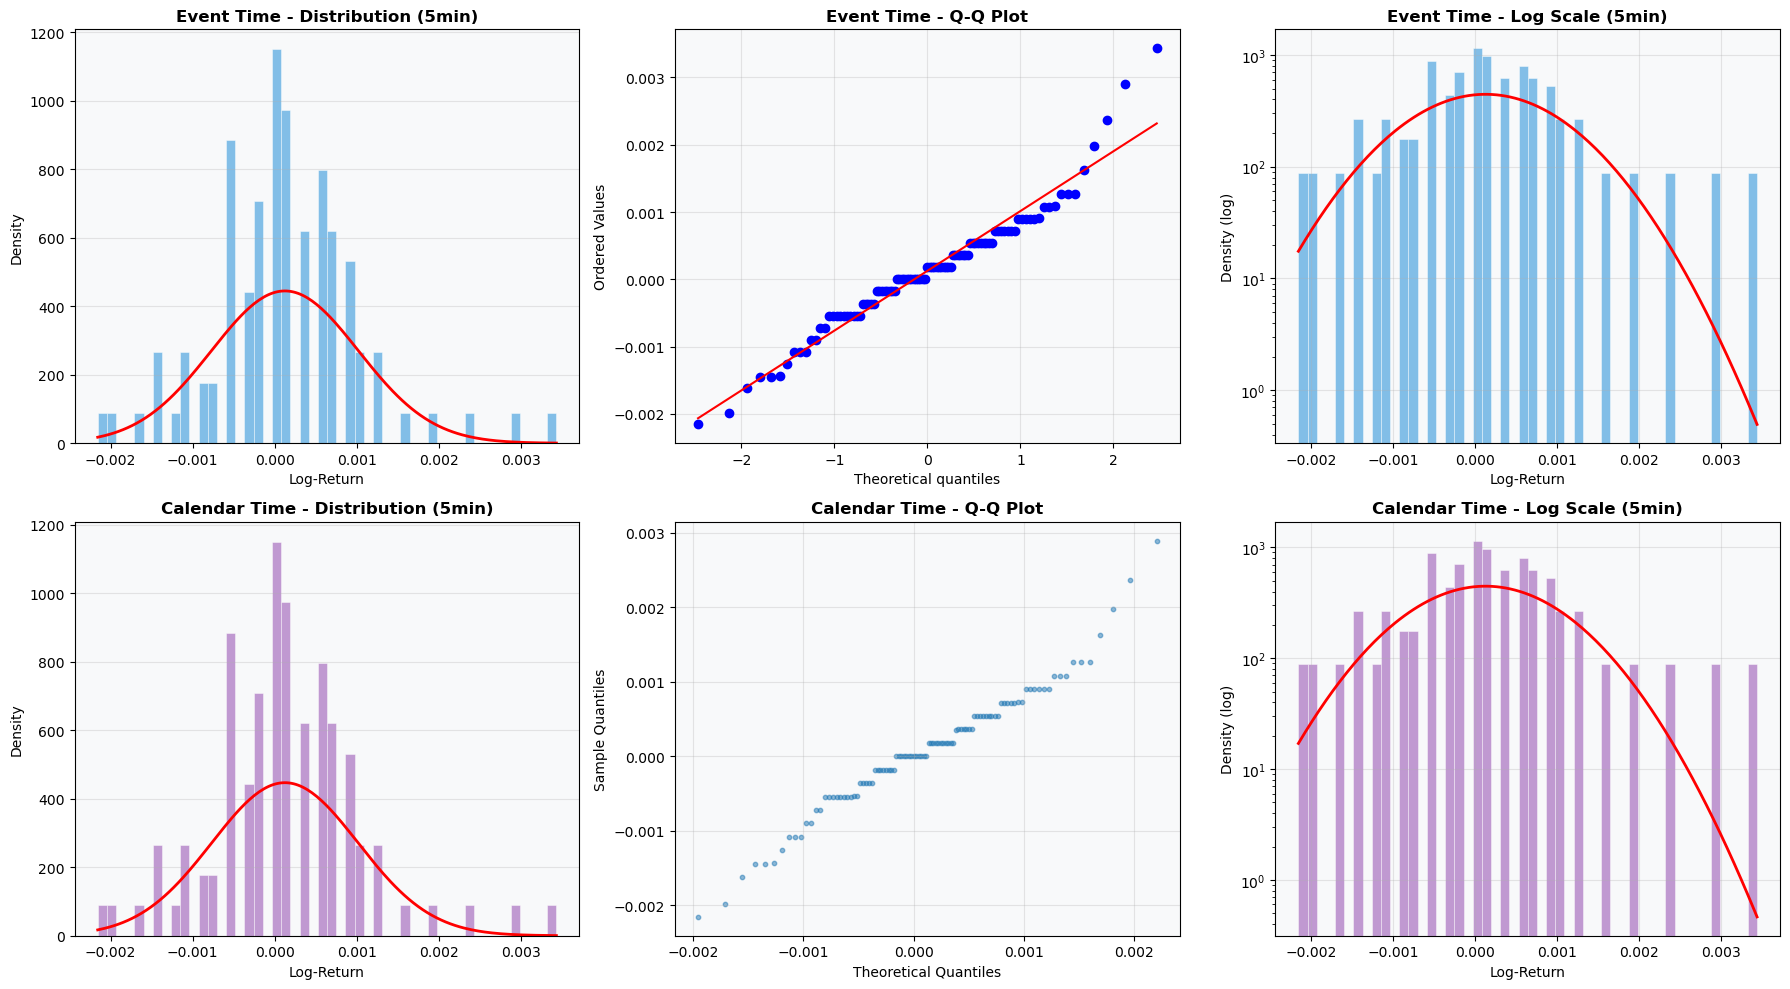

In [ ]:
freq = 5  
freq_str = f'{freq}min'

resampled = df0.resample(freq_str).agg({'log_price': 'last'}).dropna()
log_returns = resampled['log_price'].diff().dropna()
time_deltas = resampled.index.to_series().diff().dt.total_seconds()[1:] / 60
weights = time_deltas / time_deltas.sum()

fig, axes = plt.subplots(2, 3, figsize=(18, 10))

axes[0, 0].hist(log_returns, bins=50, density=True, alpha=0.6, 
                color='#3498DB', edgecolor='white', linewidth=0.5)
mu_e, sigma_e = log_returns.mean(), log_returns.std()
x = np.linspace(log_returns.min(), log_returns.max(), 200)
axes[0, 0].plot(x, stats.norm.pdf(x, mu_e, sigma_e), 'r-', linewidth=2)
axes[0, 0].set_title(f'Event Time - Distribution ({freq}min)', fontweight='bold')
axes[0, 0].set_xlabel('Log-Return')
axes[0, 0].set_ylabel('Density')
axes[0, 0].grid(True, alpha=0.3, axis='y')
axes[0, 0].set_facecolor('#F8F9FA')

stats.probplot(log_returns, dist="norm", plot=axes[0, 1])
axes[0, 1].set_title('Event Time - Q-Q Plot', fontweight='bold')
axes[0, 1].grid(True, alpha=0.3)
axes[0, 1].set_facecolor('#F8F9FA')

axes[0, 2].hist(log_returns, bins=50, density=True, alpha=0.6,
                color='#3498DB', edgecolor='white', linewidth=0.5)
axes[0, 2].plot(x, stats.norm.pdf(x, mu_e, sigma_e), 'r-', linewidth=2)
axes[0, 2].set_yscale('log')
axes[0, 2].set_title(f'Event Time - Log Scale ({freq}min)', fontweight='bold')
axes[0, 2].set_xlabel('Log-Return')
axes[0, 2].set_ylabel('Density (log)')
axes[0, 2].grid(True, alpha=0.3)
axes[0, 2].set_facecolor('#F8F9FA')

axes[1, 0].hist(log_returns, bins=50, density=True, weights=weights,
                alpha=0.6, color='#9B59B6', edgecolor='white', linewidth=0.5)
mu_c = np.average(log_returns, weights=weights)
sigma_c = np.sqrt(np.average((log_returns - mu_c)**2, weights=weights))
axes[1, 0].plot(x, stats.norm.pdf(x, mu_c, sigma_c), 'r-', linewidth=2)
axes[1, 0].set_title(f'Calendar Time - Distribution ({freq}min)', fontweight='bold')
axes[1, 0].set_xlabel('Log-Return')
axes[1, 0].set_ylabel('Density')
axes[1, 0].grid(True, alpha=0.3, axis='y')
axes[1, 0].set_facecolor('#F8F9FA')

sorted_returns = np.sort(log_returns)
sorted_weights = weights.values[np.argsort(log_returns)]
cumulative_weights = np.cumsum(sorted_weights)
theoretical_quantiles = stats.norm.ppf(cumulative_weights, mu_c, sigma_c)
axes[1, 1].scatter(theoretical_quantiles, sorted_returns, alpha=0.5, s=10)
axes[1, 1].plot([theoretical_quantiles.min(), theoretical_quantiles.max()],
                [theoretical_quantiles.min(), theoretical_quantiles.max()], 
                'r--', linewidth=2)
axes[1, 1].set_title('Calendar Time - Q-Q Plot', fontweight='bold')
axes[1, 1].set_xlabel('Theoretical Quantiles')
axes[1, 1].set_ylabel('Sample Quantiles')
axes[1, 1].grid(True, alpha=0.3)
axes[1, 1].set_facecolor('#F8F9FA')

axes[1, 2].hist(log_returns, bins=50, density=True, weights=weights,
                alpha=0.6, color='#9B59B6', edgecolor='white', linewidth=0.5)
axes[1, 2].plot(x, stats.norm.pdf(x, mu_c, sigma_c), 'r-', linewidth=2)
axes[1, 2].set_yscale('log')
axes[1, 2].set_title(f'Calendar Time - Log Scale ({freq}min)', fontweight='bold')
axes[1, 2].set_xlabel('Log-Return')
axes[1, 2].set_ylabel('Density (log)')
axes[1, 2].grid(True, alpha=0.3)
axes[1, 2].set_facecolor('#F8F9FA')

plt.tight_layout()
plt.show()